### Import Analysis Functionality

In [ ]:
#import analysis
import similarity_analysis as analysis
from importlib import reload
reload(analysis)
import os

# Create a new folder to store the plots
os.makedirs(analysis.PLOT_OUTPUT_FOLDER, exist_ok=True)

### Load Decision Results

In [2]:
# Load a dataframe with all decision results
models_to_include = ["Flan-T5", "T5-Flan-Seed-2", "T5-Flan-Seed-1", "T5-Flan-Seed-0", "T5-Tulu-Seed-0","T5-Tulu-Seed-1", "T5-Tulu-Seed-2", 'Random',  "OLMo-Flan-Seed-0", "OLMo-Flan-Seed-1", "OLMo-Flan-Seed-2", "OLMo-Tulu-Seed-0", "OLMo-Tulu-Seed-1", "OLMo-Tulu-Seed-2", "OLMo-SFT"]
df_decisions = analysis.load_decision_data(models_to_include=models_to_include)
print("Shape of dataframe:", df_decisions.shape)
# print columns
print(df_decisions.columns)


Shape of dataframe: (451270, 20)
Index(['temperature', 'treatment_extraction', 'bias', 'treatment_decision',
       'treatment_answer', 'error_message', 'model', 'treatment_options',
       'timestamp', 'individual_score', 'control_answer', 'seed', 'id',
       'treatment_option_order', 'status', 'control_extraction', 'weight',
       'control_option_order', 'control_decision', 'control_options'],
      dtype='object')


### Plot Biasedness Heatmap

/home/itay.itzhak/projects/proj2/finetuning/cognitive-biases-in-llms/run/similarity_analysis.py:591: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  star_bins = error_counts.applymap(bin_error_count_stars)


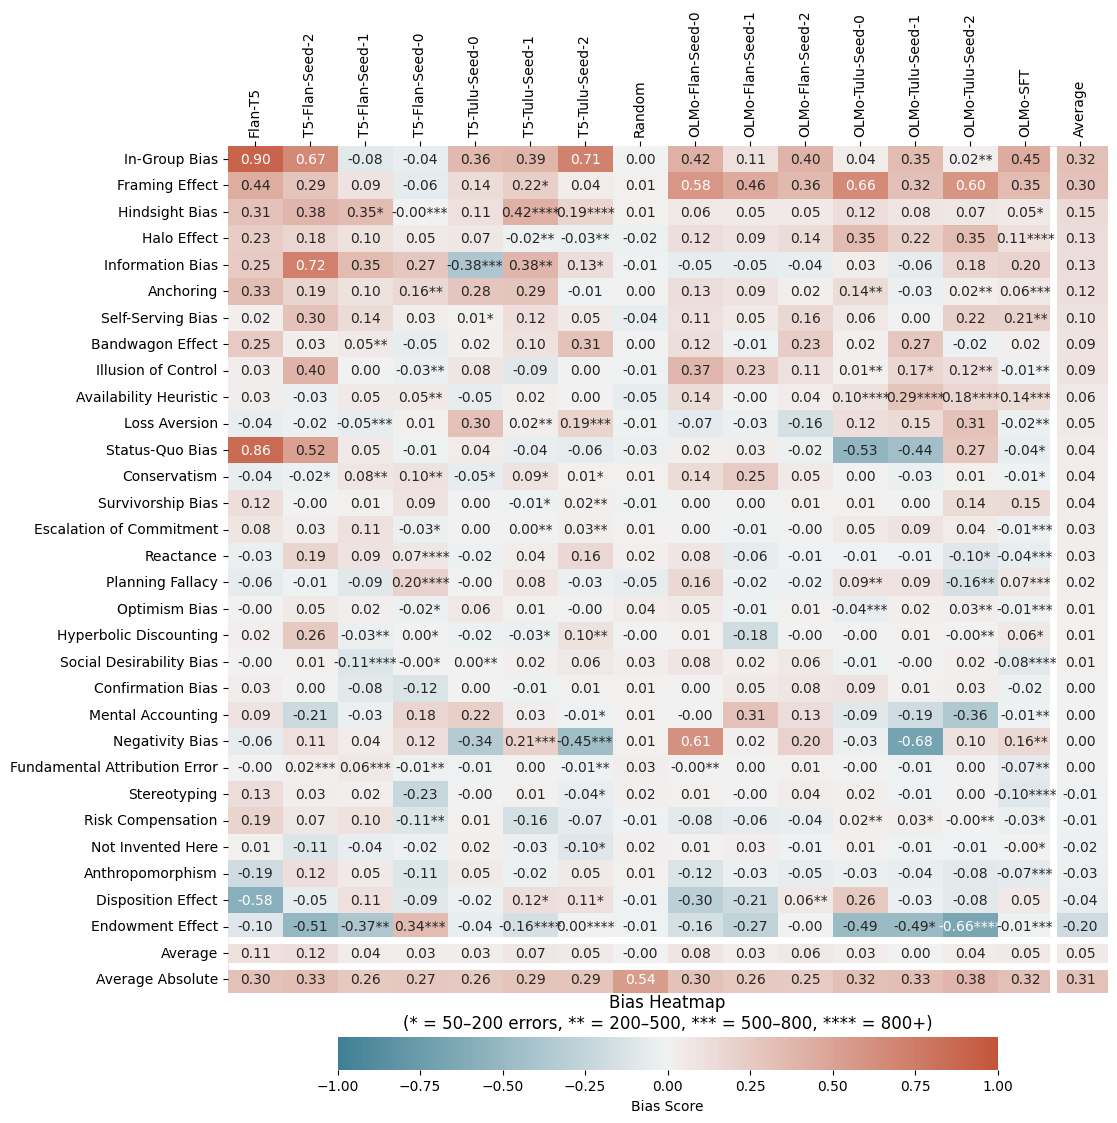

In [3]:
# Filter out from model_order models not in df_decisions
model_order = [model for model in analysis.MODEL_ORDER if model in df_decisions["model"].unique()]
# order model_order according to models_to_see
model_order = [model for model in models_to_include if model in model_order]

# Plot a mean biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, model_order=model_order, legend=True, figsize=(11, 11), save_plot=True)

/home/itay.itzhak/projects/proj2/finetuning/cognitive-biases-in-llms/run/similarity_analysis.py:534: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  add_avg_abs: If True, adds an 'Average Absolute' row


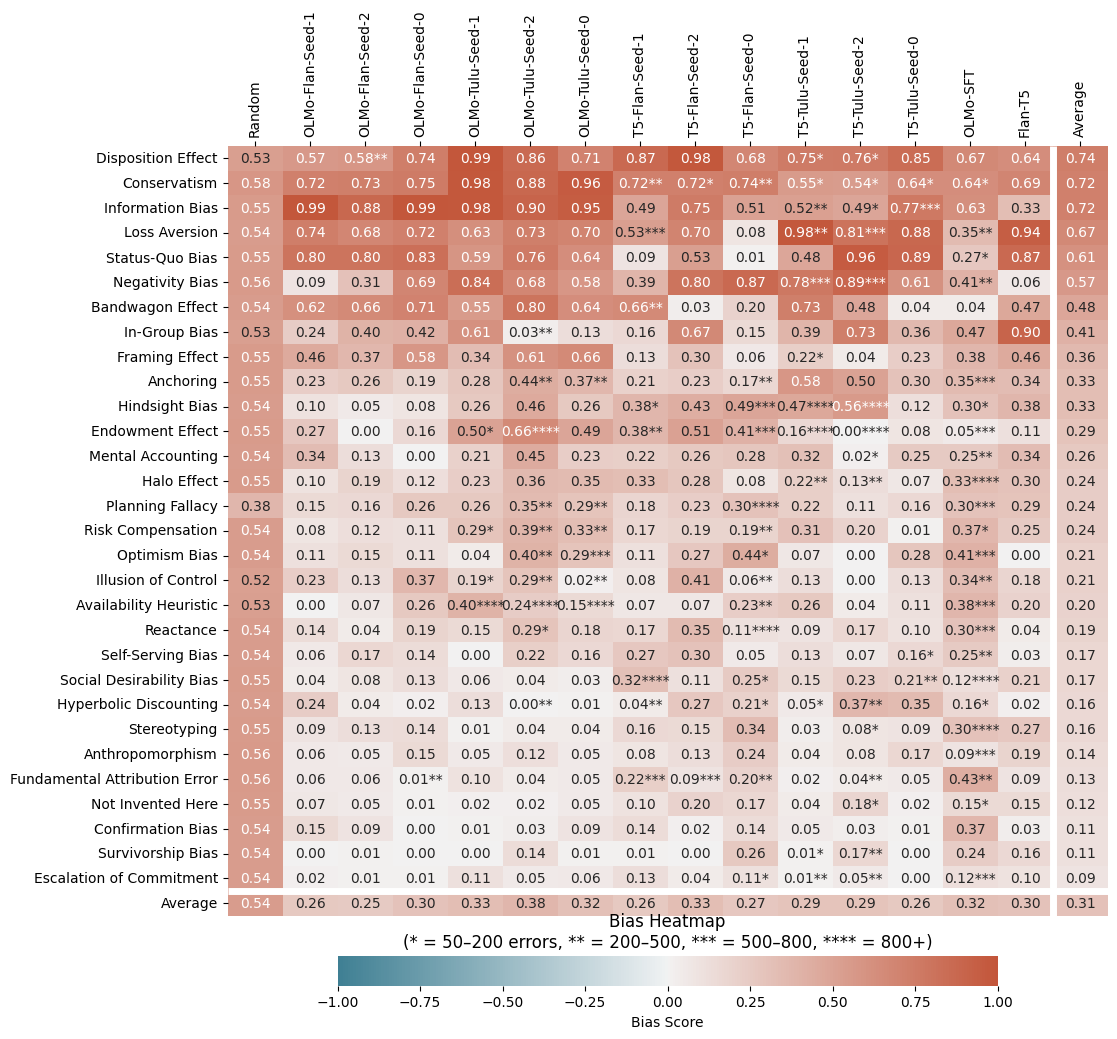

In [23]:
# Plot a mean absolute biasedness heatmap
analysis.plot_bias_heatmap(df_decisions, legend=True, figsize=(11, 10), add_avg_abs=False, save_plot=False, abs=True)

/home/itay.itzhak/projects/proj2/finetuning/cognitive-biases-in-llms/run/similarity_analysis.py:534: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  add_avg_abs: If True, adds an 'Average Absolute' row


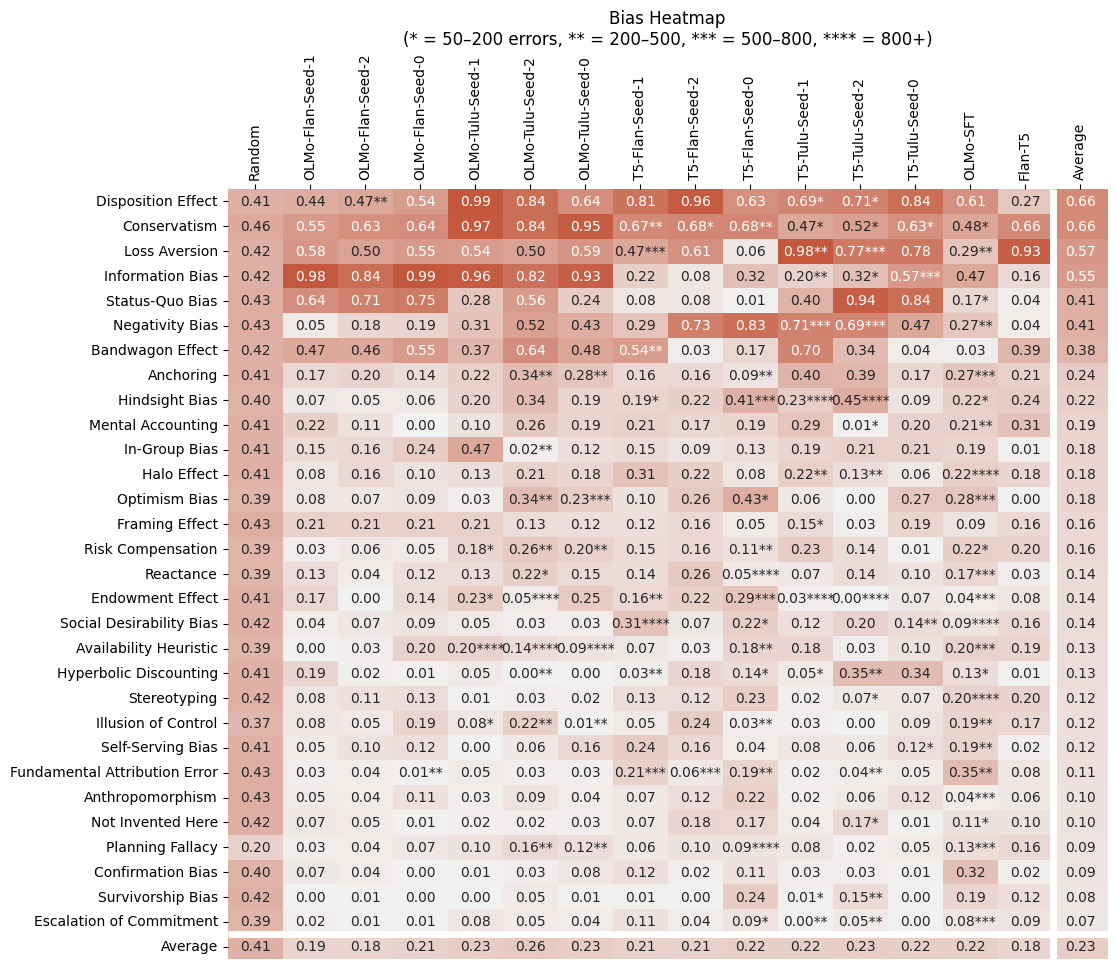

In [24]:
# Plot a bias variance heatmap
analysis.plot_bias_heatmap(df_decisions, legend=False, add_avg_abs=False, figsize=(11, 10), save_plot=False, agg='var')

### Prepare Data for Pattern Analysis

In [24]:
# Load a dataframe with test results per model
# Remove Random from df_decisions
df_decisions_no_random = df_decisions[df_decisions["model"] != "Random"].copy()
df_biasedness = analysis.load_model_bias_data(df_decisions=df_decisions_no_random)
print("Shape of dataframe:", df_biasedness.shape)
print(f"Columns of dataframe:\n{df_biasedness.columns}")
# Impute missing values (i.e., failed test cases)
df_biasedness = analysis.impute_missing_values(df_biasedness)

Shape of dataframe: (421000, 4)
Columns of dataframe:
Index(['model', 'scenario', 'bias', 'individual_score'], dtype='object')


### Plot Scatterplots of Full Dataset

In [8]:
# Prepare dimensionality reduction of data
df_pca = analysis.reduce_with_pca(df_biasedness)


DEBUG: Scatter plot input:
Shape: (3000, 4)
Columns: ['PCA Component 1', 'PCA Component 2', 'model', 'scenario']
Unique model values: ['Flan-T5' 'OLMo-Flan-Seed-0' 'OLMo-Flan-Seed-1' 'OLMo-Flan-Seed-2'
 'OLMo-SFT' 'OLMo-Tulu-Seed-0' 'OLMo-Tulu-Seed-1' 'OLMo-Tulu-Seed-2'
 'Random' 'T5-Flan-Seed-0' 'T5-Flan-Seed-1' 'T5-Flan-Seed-2'
 'T5-Tulu-Seed-0' 'T5-Tulu-Seed-1' 'T5-Tulu-Seed-2']
Number of unique model values: 15


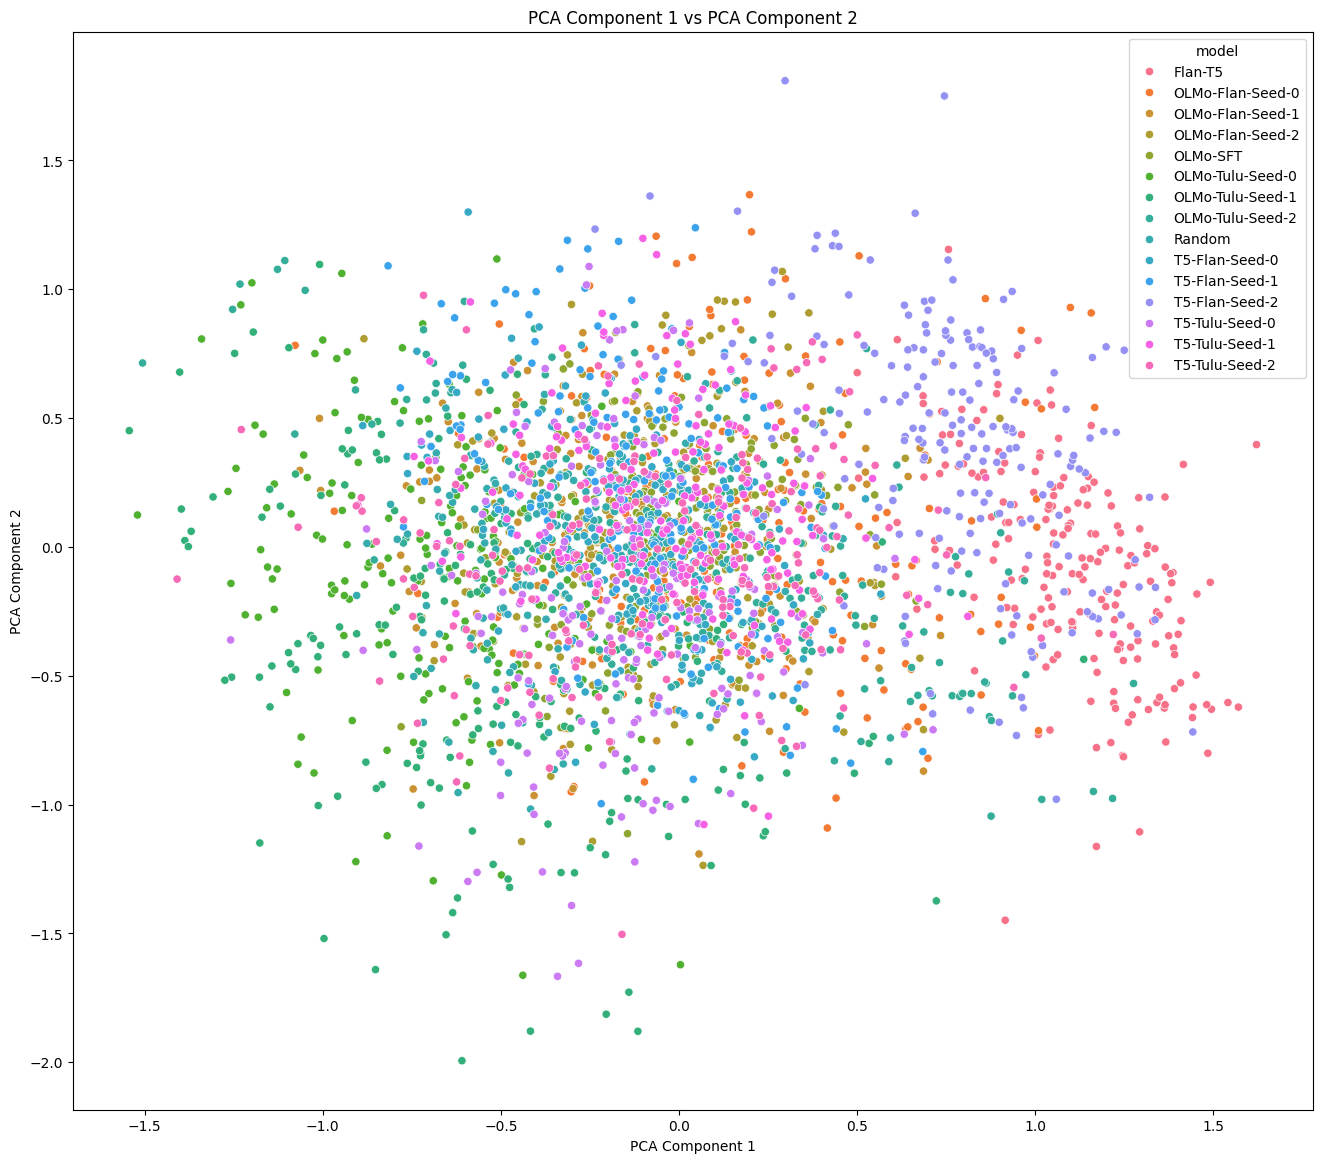

In [ ]:
# Perform PCA and create a scatter plot showing the models
#df_scatter = df_pca
#df_scatter["Model"] = df_biasedness["model"]
#analysis.plot_scatter(df_scatter, label="model", save_plot=True)
df_scatter = df_pca.copy()
df_scatter["Model"] = df_scatter["model"]
analysis.plot_scatter(df_scatter, label="Model", plot_type="pca", save_plot=True)


DEBUG: Scatter plot input:
Shape: (3000, 5)
Columns: ['PCA Component 1', 'PCA Component 2', 'model', 'scenario', 'Developer']
Unique Developer values: ['Google' 'OLMo-Flan' 'AI2' 'OLMo-Tulu' 'None' 'T5-Flan' 'T5-Tulu']
Number of unique Developer values: 7


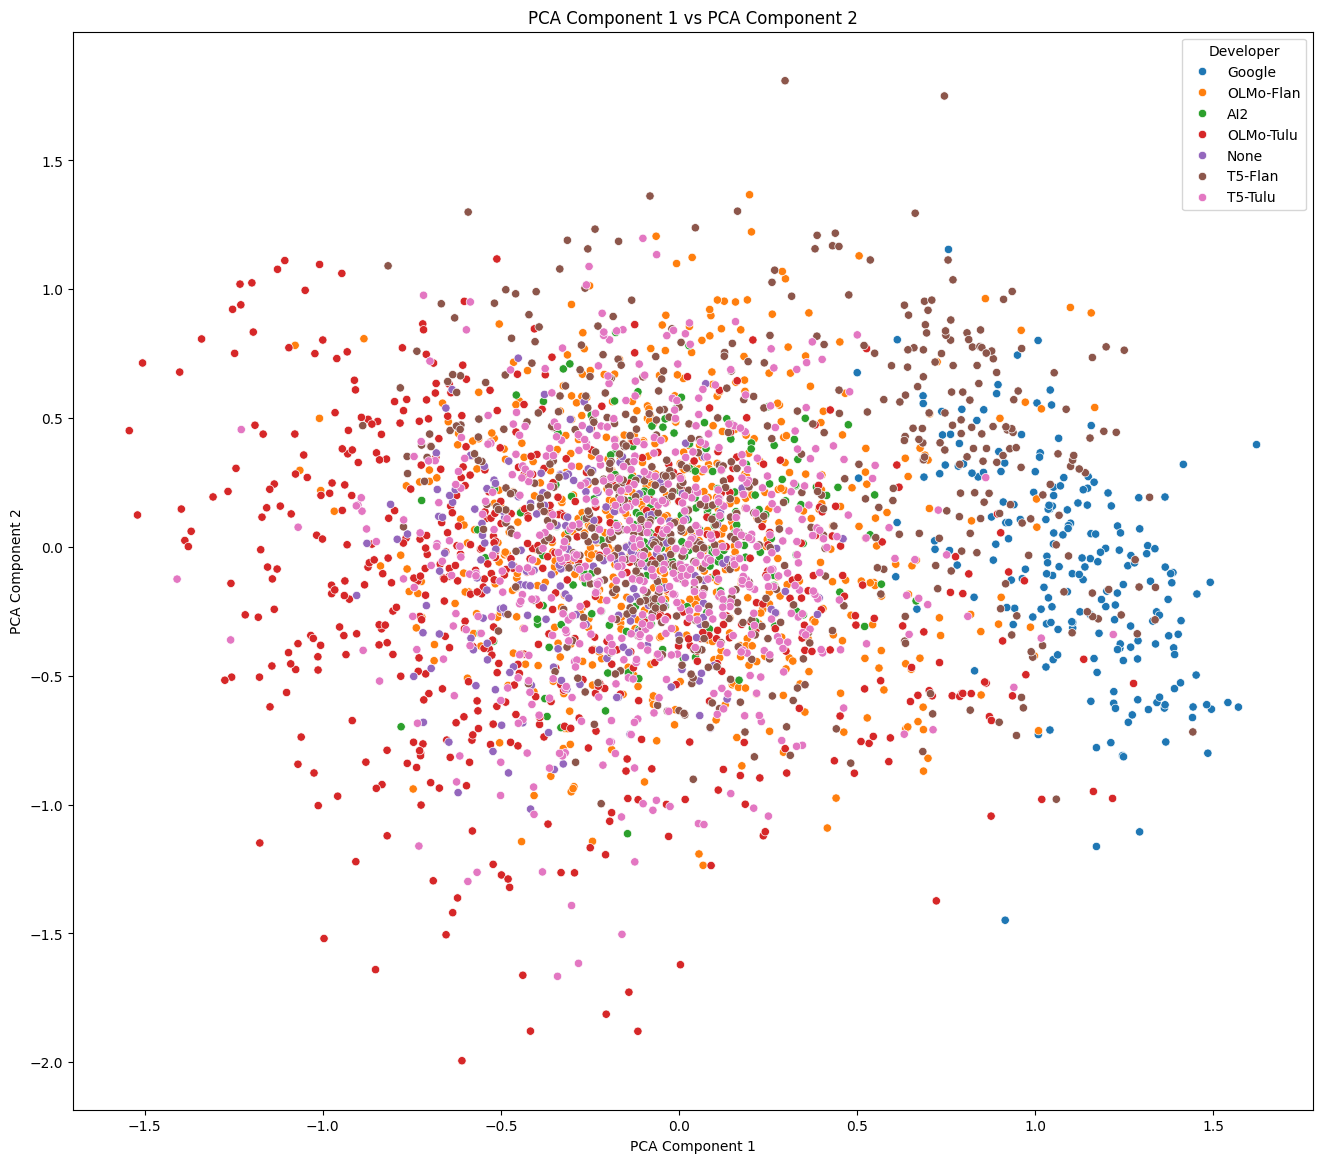

In [28]:
# Perform PCA and create a scatter plot showing the model developers
#df_scatter = df_pca
#df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
#analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca.copy()  # Make a copy to avoid modifying original
df_scatter["Developer"] = df_scatter["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)


DEBUG: Initial dataframe:
Shape: (451000, 4)
Columns: ['model', 'scenario', 'bias', 'individual_score']
Number of unique models: 15
Unique models: ['Flan-T5' 'OLMo-Flan-Seed-0' 'OLMo-Flan-Seed-1' 'OLMo-Flan-Seed-2'
 'OLMo-SFT' 'OLMo-Tulu-Seed-0' 'OLMo-Tulu-Seed-1' 'OLMo-Tulu-Seed-2'
 'Random' 'T5-Flan-Seed-0' 'T5-Flan-Seed-1' 'T5-Flan-Seed-2'
 'T5-Tulu-Seed-0' 'T5-Tulu-Seed-1' 'T5-Tulu-Seed-2']



DEBUG: After pivot:
Shape: (3000, 32)
Columns: ['model', 'scenario', 'Anchoring', 'Anthropomorphism', 'Availability Heuristic', 'Bandwagon Effect', 'Confirmation Bias', 'Conservatism', 'Disposition Effect', 'Endowment Effect', 'Escalation of Commitment', 'Framing Effect', 'Fundamental Attribution Error', 'Halo Effect', 'Hindsight Bias', 'Hyperbolic Discounting', 'Illusion of Control', 'In-Group Bias', 'Information Bias', 'Loss Aversion', 'Mental Accounting', 'Negativity Bias', 'Not Invented Here', 'Optimism Bias', 'Planning Fallacy', 'Reactance', 'Risk Compensation', 'Self-Serving Bias', 'Social Desirability Bias', 'Status-Quo Bias', 'Stereotyping', 'Survivorship Bias']
Number of unique models: 15
Unique models: ['Flan-T5' 'OLMo-Flan-Seed-0' 'OLMo-Flan-Seed-1' 'OLMo-Flan-Seed-2'
 'OLMo-SFT' 'OLMo-Tulu-Seed-0' 'OLMo-Tulu-Seed-1' 'OLMo-Tulu-Seed-2'
 'Random' 'T5-Flan-Seed-0' 'T5-Flan-Seed-1' 'T5-Flan-Seed-2'
 'T5-Tulu-Seed-0' 'T5-Tulu-Seed-1' 'T5-Tulu-Seed-2']

DEBUG: UMAP input:
Bias c

/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



DEBUG: Final UMAP result:
Shape: (3000, 4)
Columns: ['UMAP Component 1', 'UMAP Component 2', 'model', 'scenario']
Number of unique models: 15
Unique models: ['Flan-T5' 'OLMo-Flan-Seed-0' 'OLMo-Flan-Seed-1' 'OLMo-Flan-Seed-2'
 'OLMo-SFT' 'OLMo-Tulu-Seed-0' 'OLMo-Tulu-Seed-1' 'OLMo-Tulu-Seed-2'
 'Random' 'T5-Flan-Seed-0' 'T5-Flan-Seed-1' 'T5-Flan-Seed-2'
 'T5-Tulu-Seed-0' 'T5-Tulu-Seed-1' 'T5-Tulu-Seed-2']

DEBUG: Scatter plot input:
Shape: (3000, 5)
Columns: ['UMAP Component 1', 'UMAP Component 2', 'model', 'scenario', 'Model']
Unique Model values: ['Flan-T5', 'OLMo-Flan-Seed-0', 'OLMo-Flan-Seed-1', 'OLMo-Flan-Seed-2', 'OLMo-SFT', 'OLMo-Tulu-Seed-0', 'OLMo-Tulu-Seed-1', 'OLMo-Tulu-Seed-2', 'Random', 'T5-Flan-Seed-0', 'T5-Flan-Seed-1', 'T5-Flan-Seed-2', 'T5-Tulu-Seed-0', 'T5-Tulu-Seed-1', 'T5-Tulu-Seed-2']
Number of unique Model values: 15


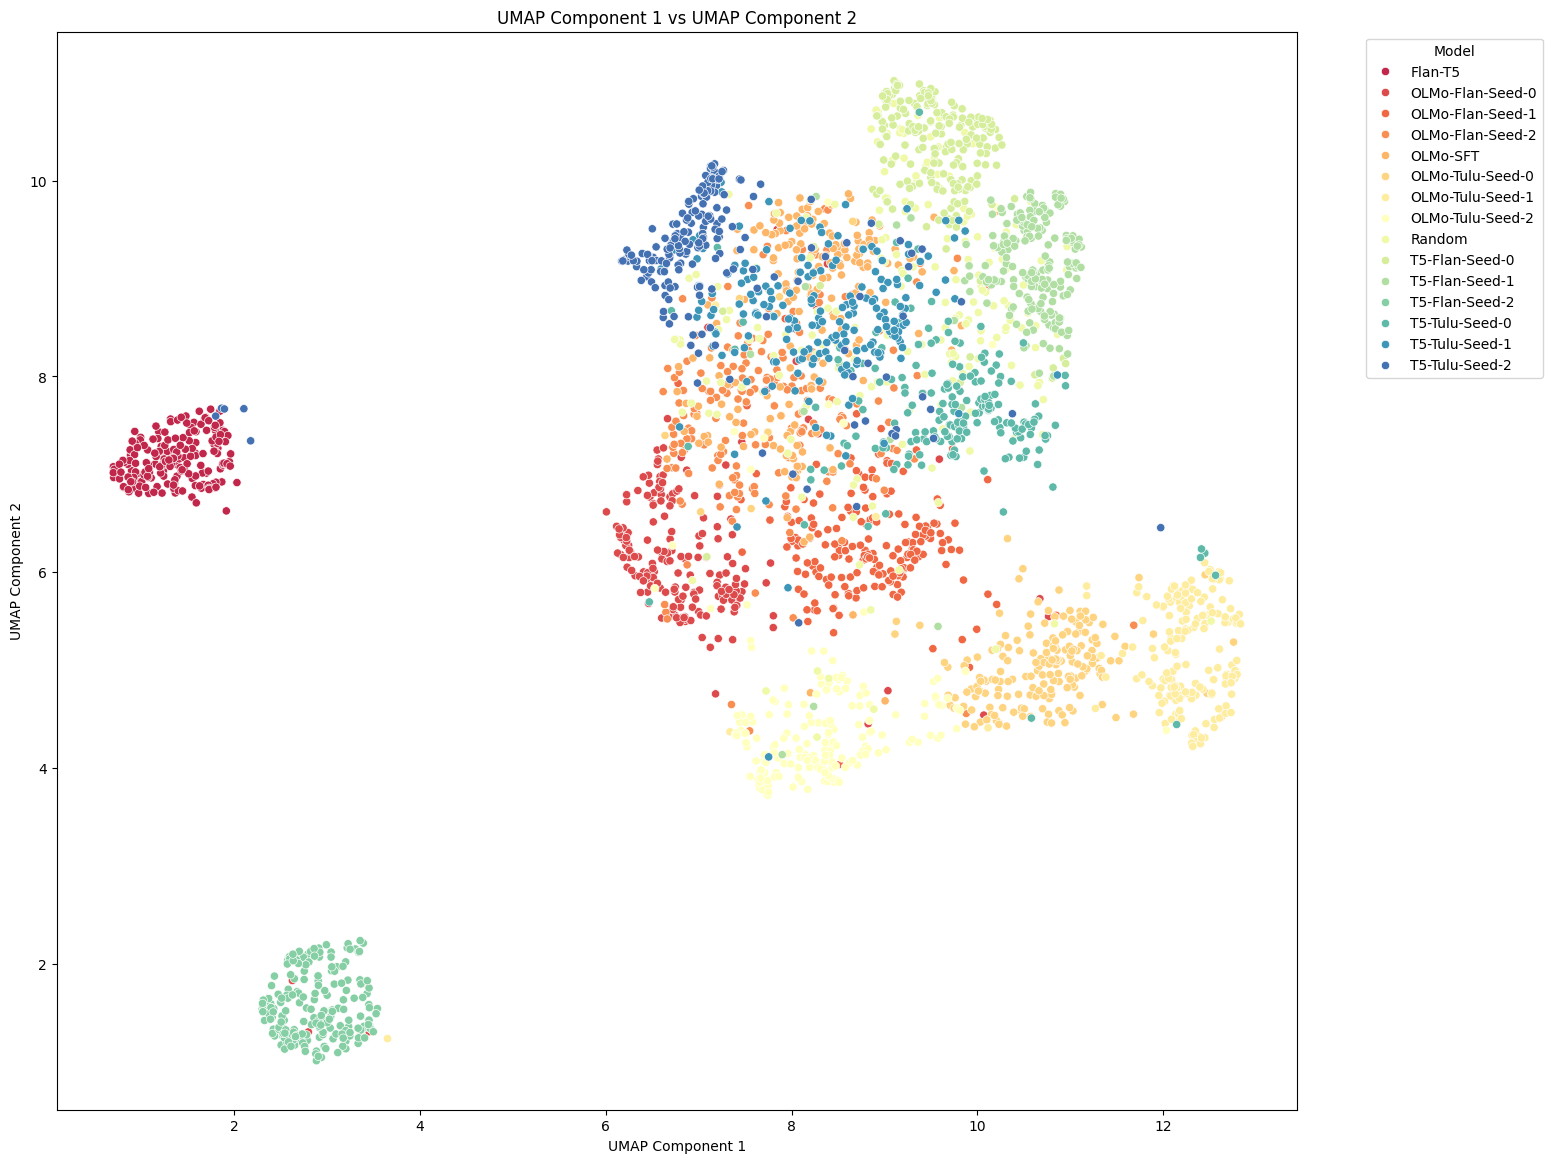

In [33]:
# Perform UMAP and create a scatter plot showing the models
df_umap = analysis.reduce_with_umap(df_biasedness)
df_scatter = df_umap.copy()  # Make a copy to avoid modifying original
df_scatter["Model"] = df_scatter["model"]  # Use existing model column
analysis.plot_scatter(df_scatter, label="Model", plot_type="umap", save_plot=True)


DEBUG: Scatter plot input:
Shape: (3000, 5)
Columns: ['UMAP Component 1', 'UMAP Component 2', 'model', 'scenario', 'Developer']
Unique Developer values: ['AI2', 'Google', 'None', 'OLMo-Flan', 'OLMo-Tulu', 'T5-Flan', 'T5-Tulu']
Number of unique Developer values: 7


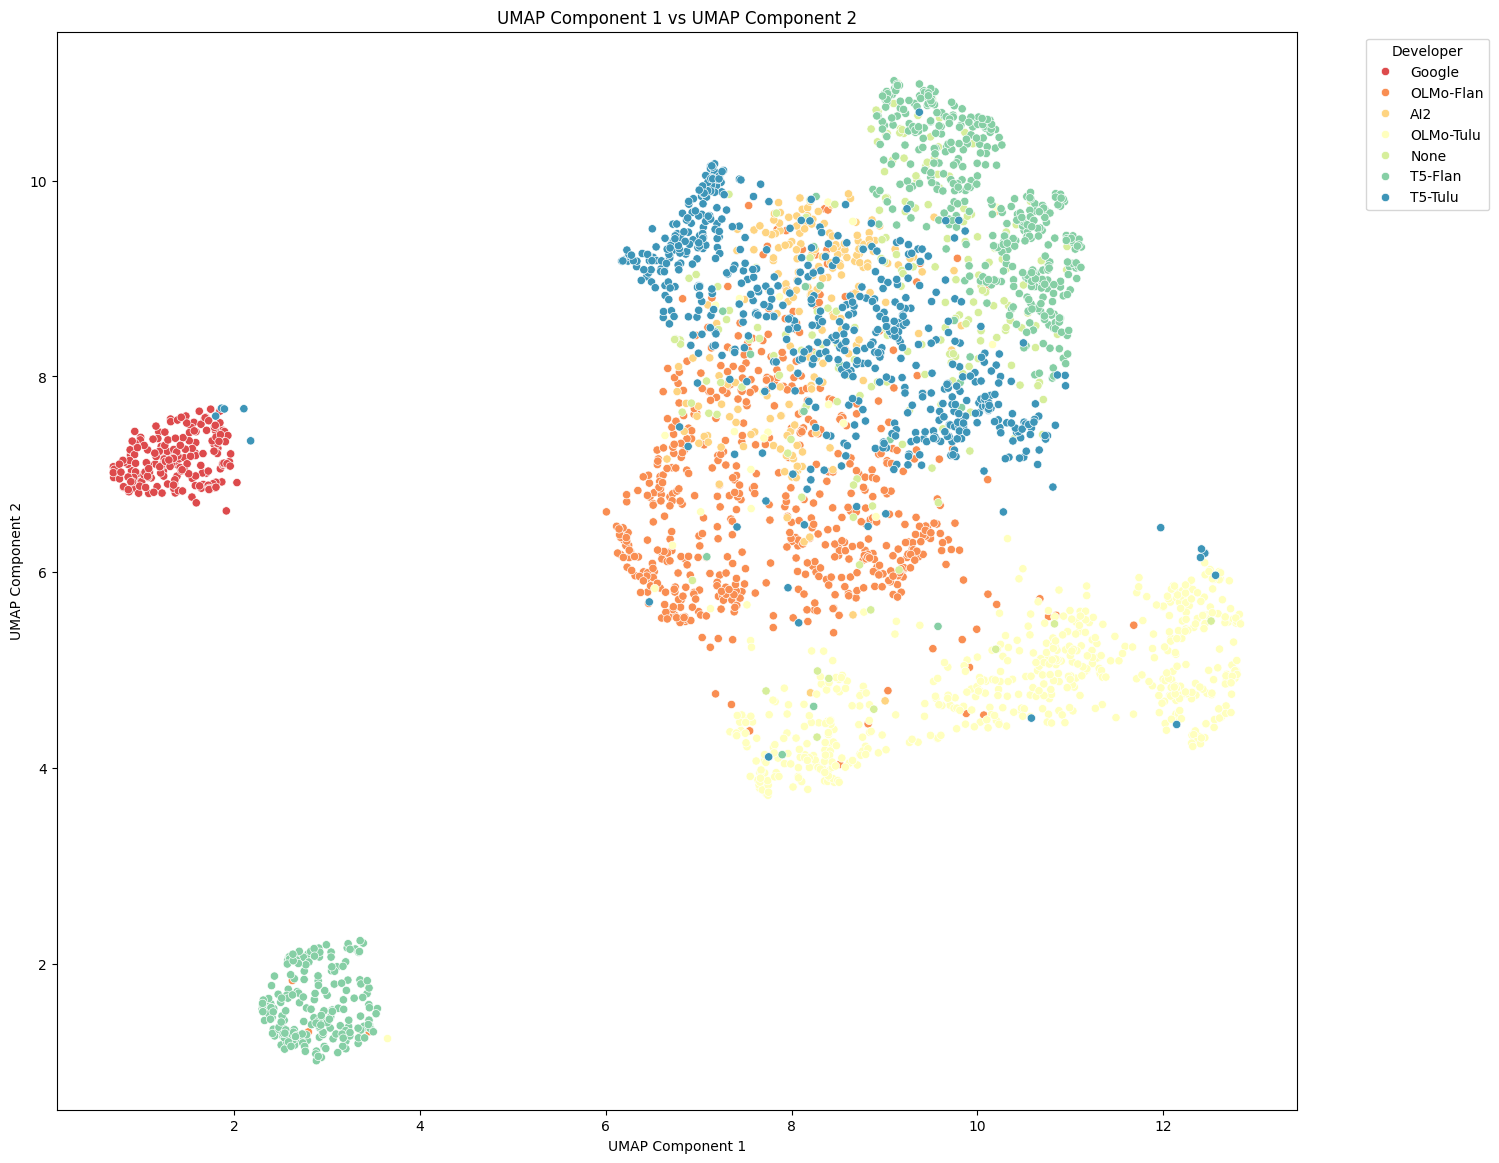

In [35]:
# Perform UMAP and create a scatter plot showing the models
#df_scatter = df_umap
#df_scatter["Developer"] = df_biasedness["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
#analysis.plot_scatter(df_scatter, label="Developer", plot_type="umap", save_plot=True)

# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap.copy()  # Make a copy to avoid modifying original
df_scatter["Developer"] = df_scatter["model"].map(analysis.MODEL_DEVELOPER_MAPPING)  # Map from df_scatter's model column
analysis.plot_scatter(df_scatter, label="Developer", plot_type="umap", save_plot=True)

### Plot Scatterplots of Models

In [45]:
# Instead of all next cells, run only this:
# Calculate embeddings once
df_pca, df_umap = analysis.calculate_model_embeddings(df_biasedness, debug=False)

/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


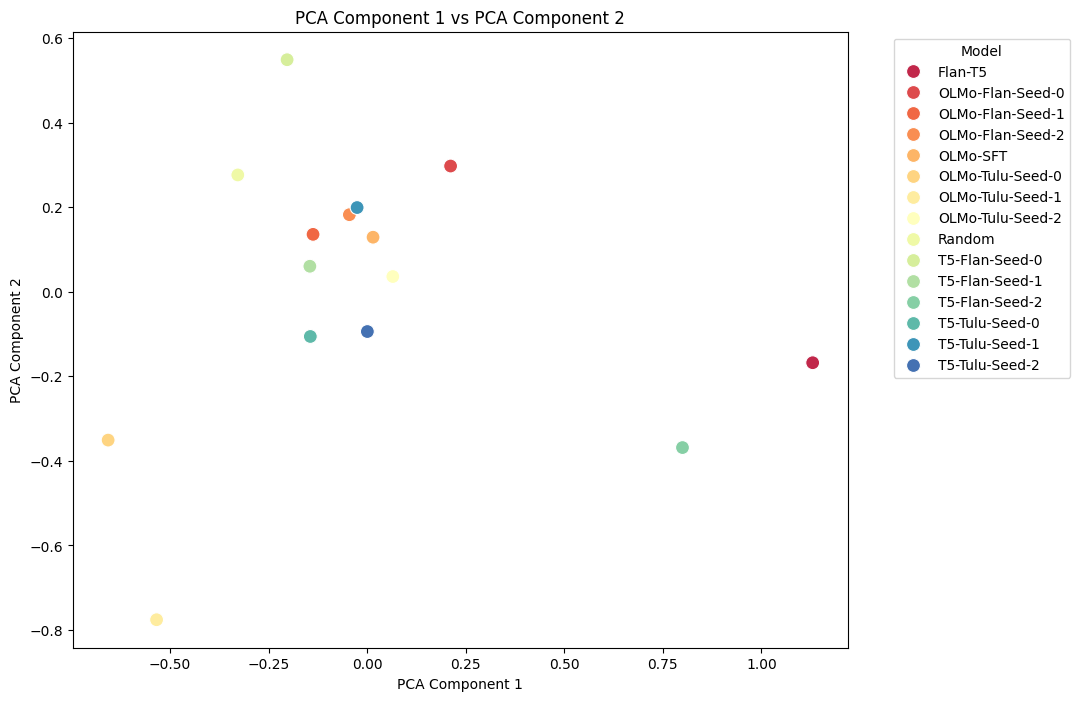

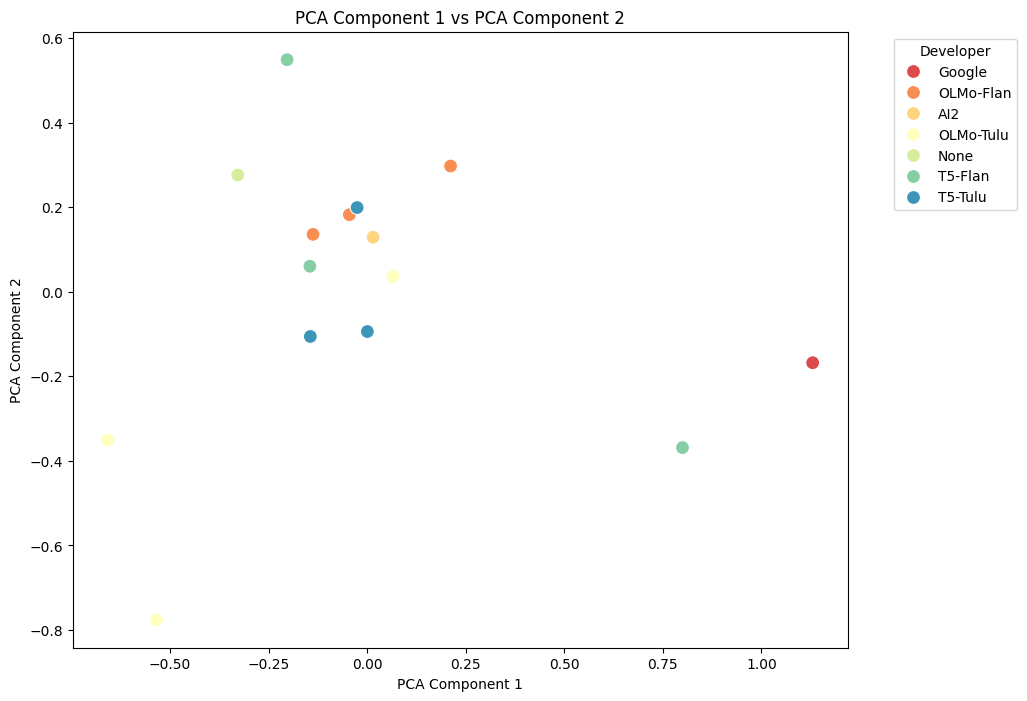

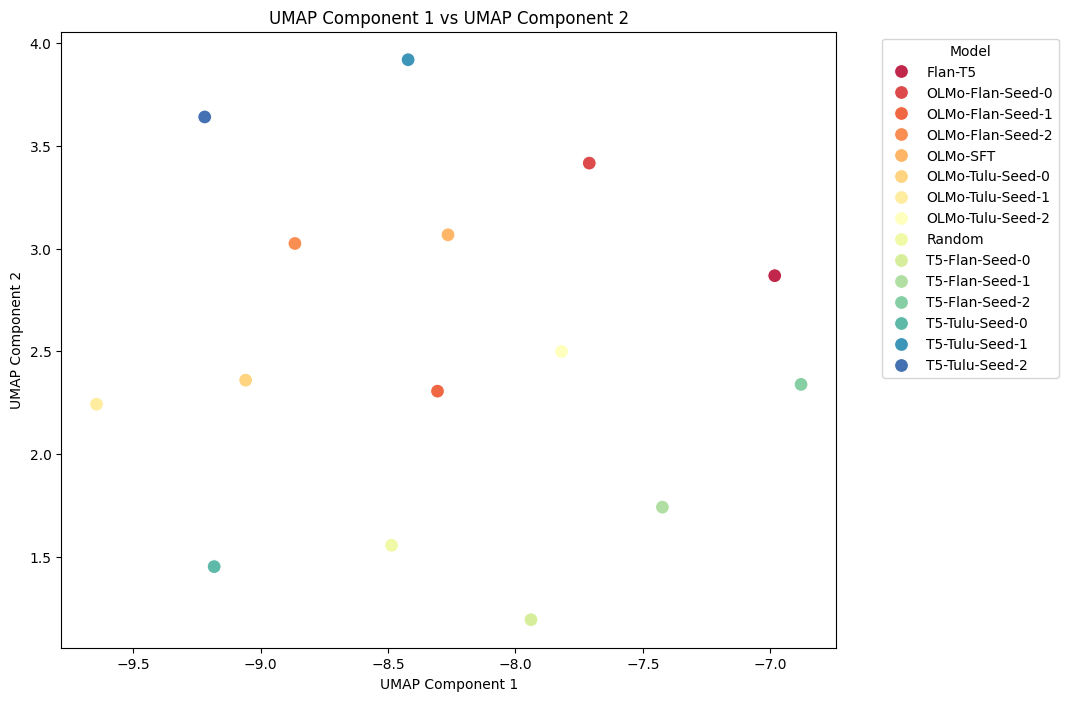

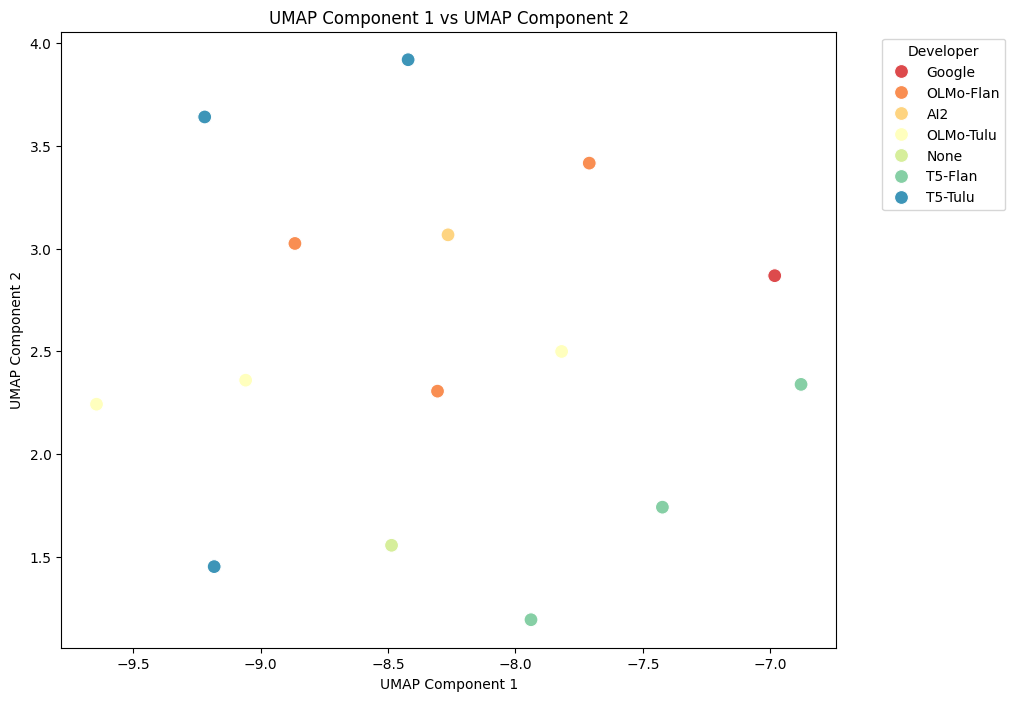

In [47]:
# Then create different plots with different parameters

# Plot PCA and UMAP embeddings on model embeddings
analysis.plot_model_embeddings(
    df_pca, 
    df_umap,
    dot_size=100,
    dot_alpha=1.0,
    figsize=(10, 8)
)

# Or use the combined function as before
#analysis.create_model_plots(df_biasedness, dot_size=50, dot_alpha=1.0)

## Hierarchical Clustering and Correlation


Plotting dendrogram with method=complete, metric=euclidean


/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:3409: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


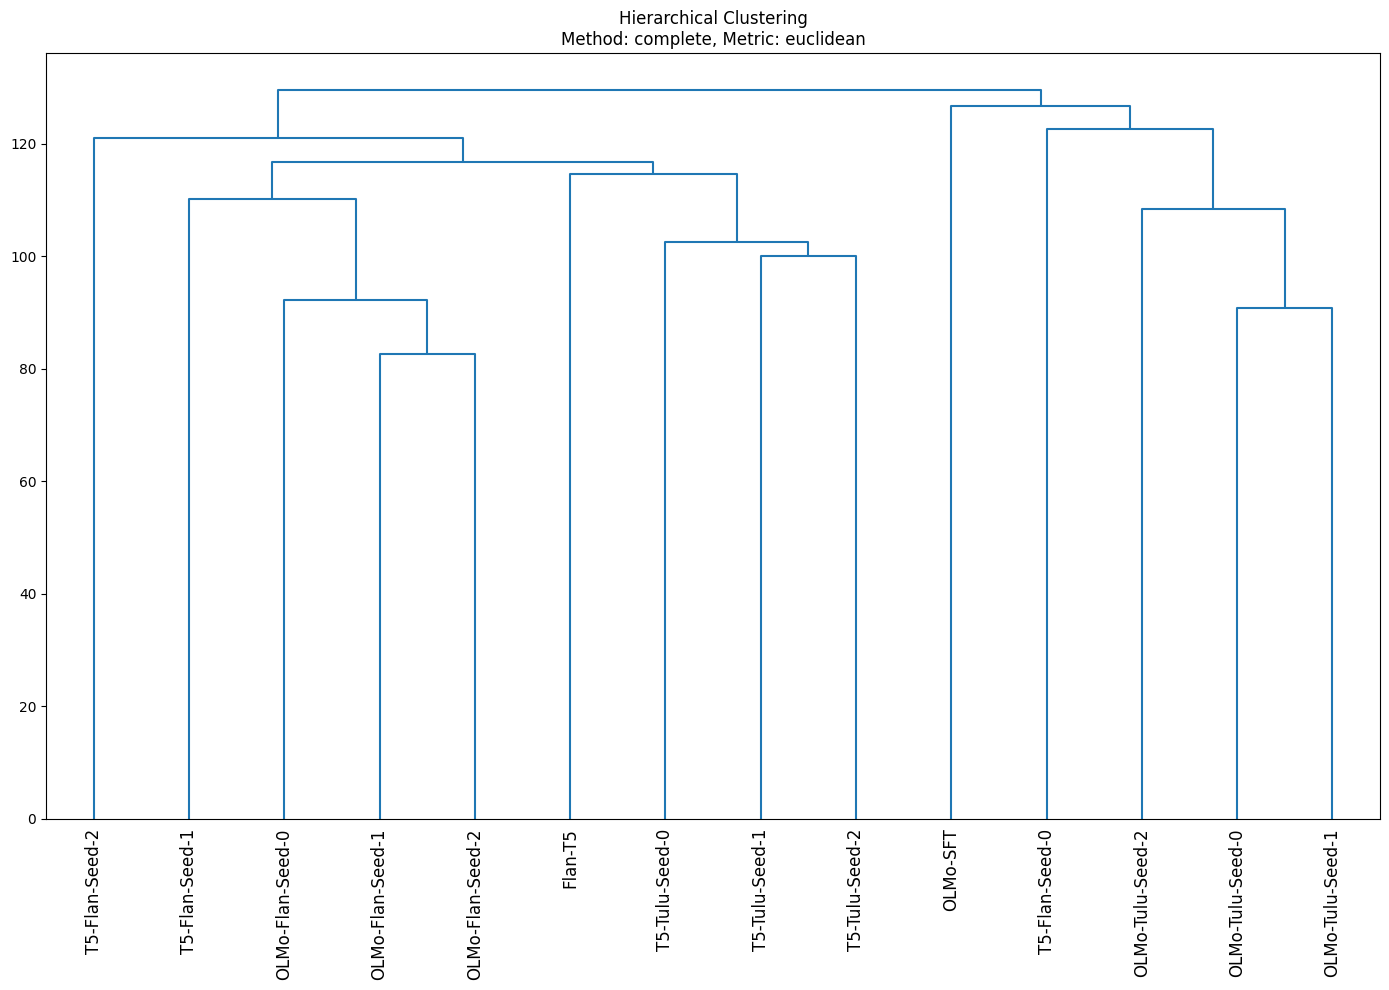


Plotting dendrogram with method=complete, metric=cosine


/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:3409: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


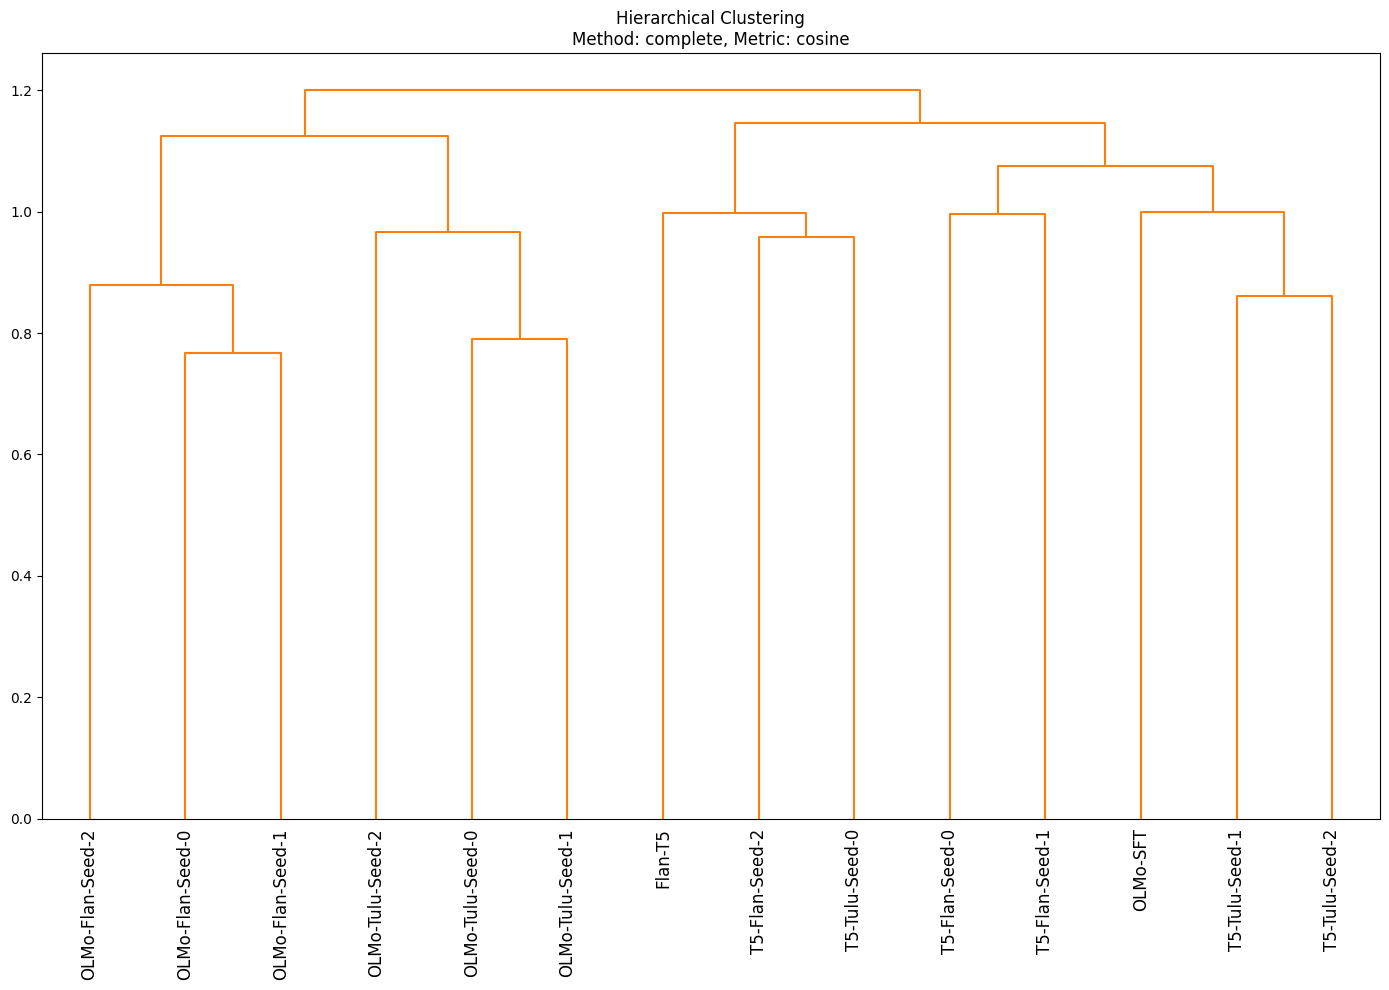


Plotting dendrogram with method=ward, metric=euclidean


/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:3409: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


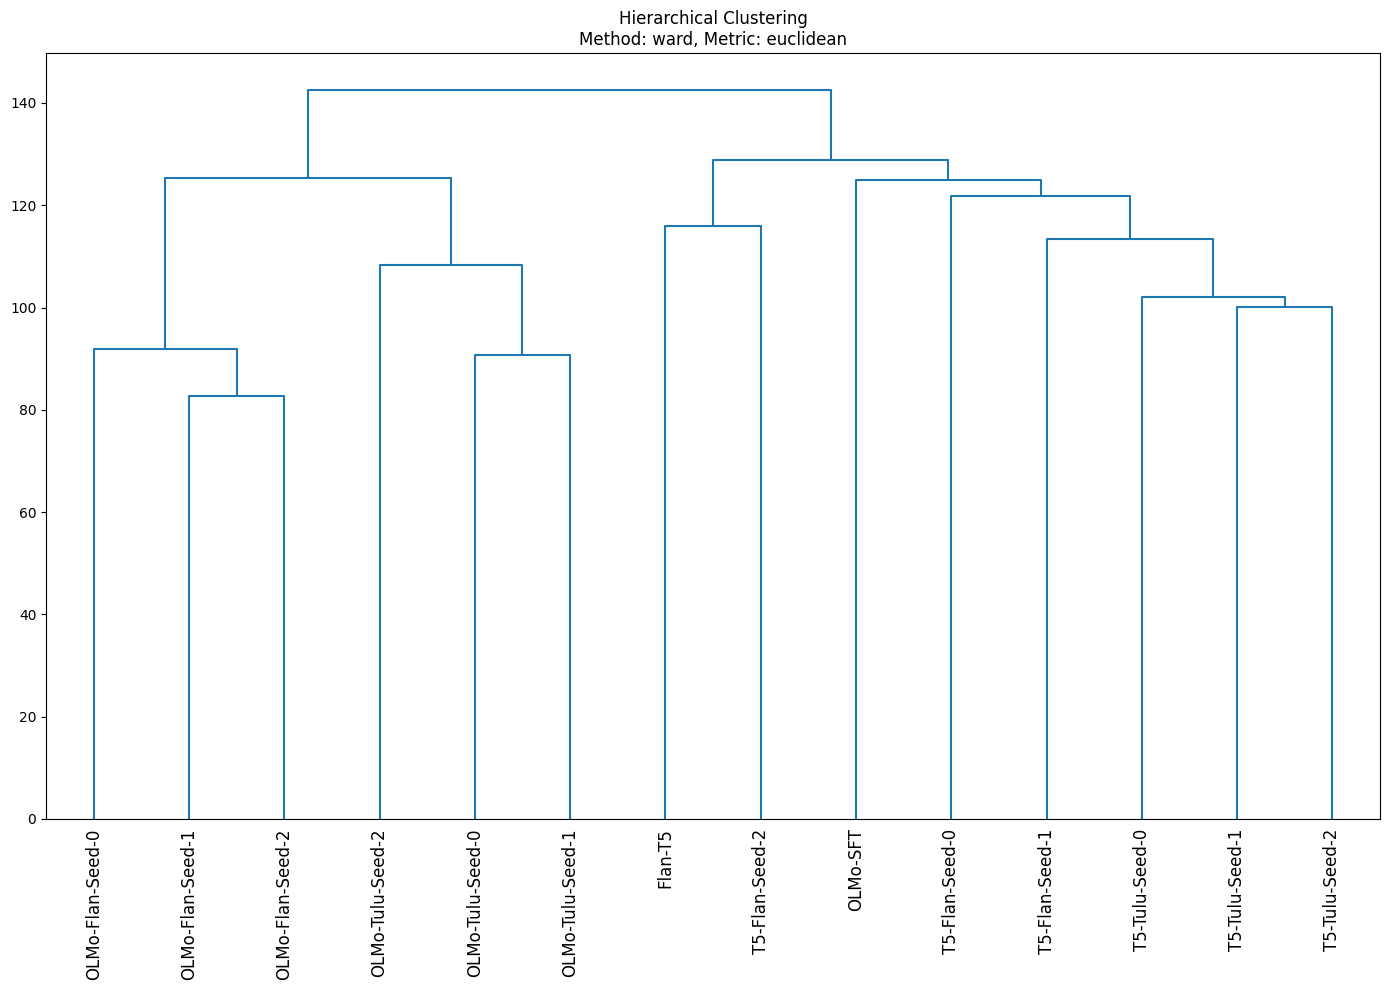

In [25]:
# Hierarchical clustering
cluster_data = analysis.run_hierarchical_clustering_analysis(
    df_biasedness,
    #level='model_bias'
    level='model_bias_scenario'
)
analysis.plot_clustering_analysis(
    cluster_data,
    methods=['complete', 'ward'],
    metrics=['euclidean', 'cosine'],
    n_clusters=12,
    save_plots=True,
    figsize=(14, 10),
    debug=True
)

In [30]:
# Unsupervised clustering
feature_matrix, model_metadata = analysis.prepare_clustering_data(
    df_biasedness,
    level='model_bias_scenario',
    debug=True
)

clustering_results = analysis.perform_unsupervised_clustering_analysis(
    feature_matrix,
    model_metadata,
    n_clusters=2,
    debug=True
)

# Supervised clustering
clustering_results = analysis.perform_supervised_clustering_analysis(
    feature_matrix,
    model_metadata,
    num_random_assignment=5,
    debug=True
)


Preparing clustering data at model_bias_scenario level...
Feature matrix shape: (14, 6000)
Models: ['Flan-T5', 'OLMo-Flan-Seed-0', 'OLMo-Flan-Seed-1', 'OLMo-Flan-Seed-2', 'OLMo-SFT', 'OLMo-Tulu-Seed-0', 'OLMo-Tulu-Seed-1', 'OLMo-Tulu-Seed-2', 'T5-Flan-Seed-0', 'T5-Flan-Seed-1', 'T5-Flan-Seed-2', 'T5-Tulu-Seed-0', 'T5-Tulu-Seed-1', 'T5-Tulu-Seed-2']

Model groups:
Pretraining groups: ['T5', 'OLMo']
Instruction groups: ['Flan', 'Tulu']

Unsupervised Clustering Results:

K-means clustering:
silhouette: 0.044
calinski_harabasz: 1.613
davies_bouldin: 2.714

Supervised Clustering Results:

Pretraining Groups:
silhouette: 0.043
calinski_harabasz: 1.602
davies_bouldin: 2.722

Instruction Groups:
silhouette: 0.018
calinski_harabasz: 1.216
davies_bouldin: 3.127

Random Assignment (mean of 5 runs):
silhouette: -0.003
calinski_harabasz: 0.958
davies_bouldin: 3.536


In [ ]:
# For model-bias-scenario level analysis
results = analysis.run_clustering_analysis(df_biasedness, level='model_bias_scenario', debug=True)


Plotting dendrogram with method=complete, metric=euclidean


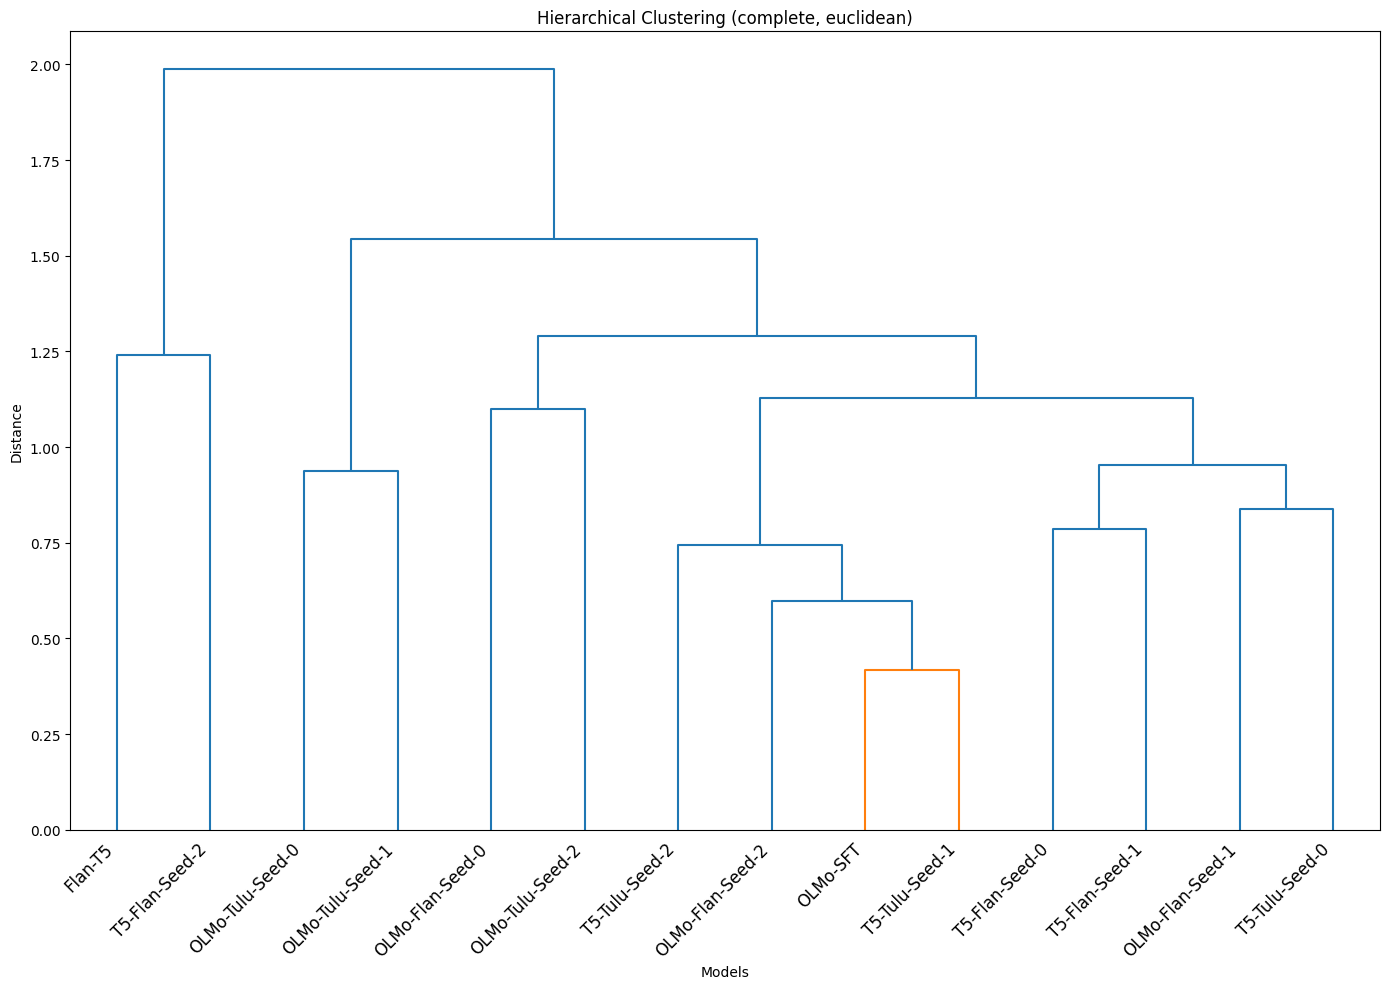


Plotting dendrogram with method=complete, metric=cosine


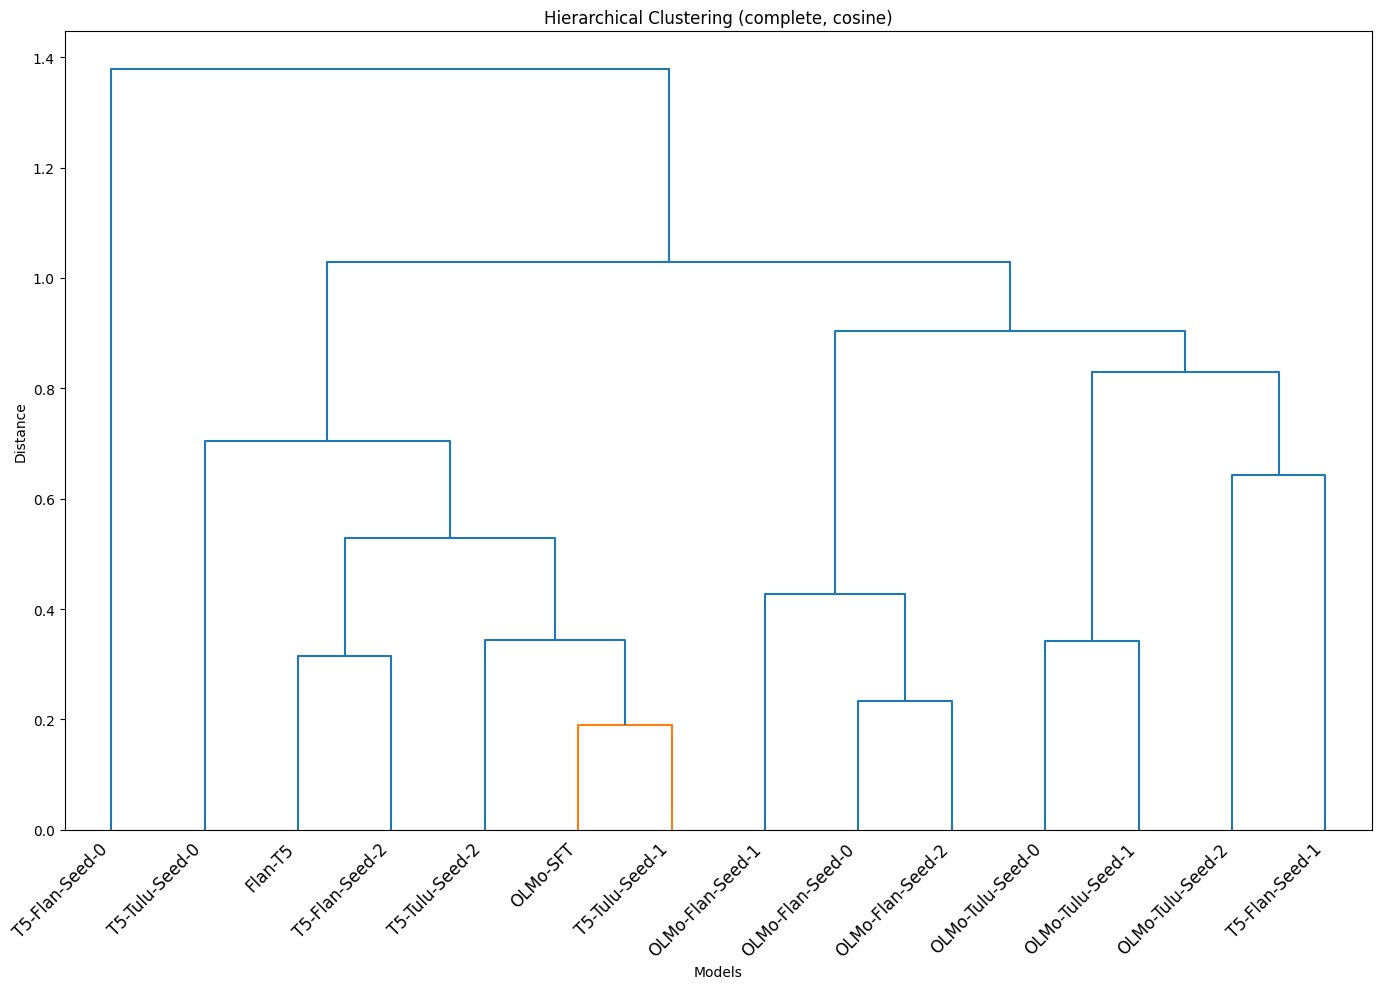


Plotting dendrogram with method=ward, metric=euclidean


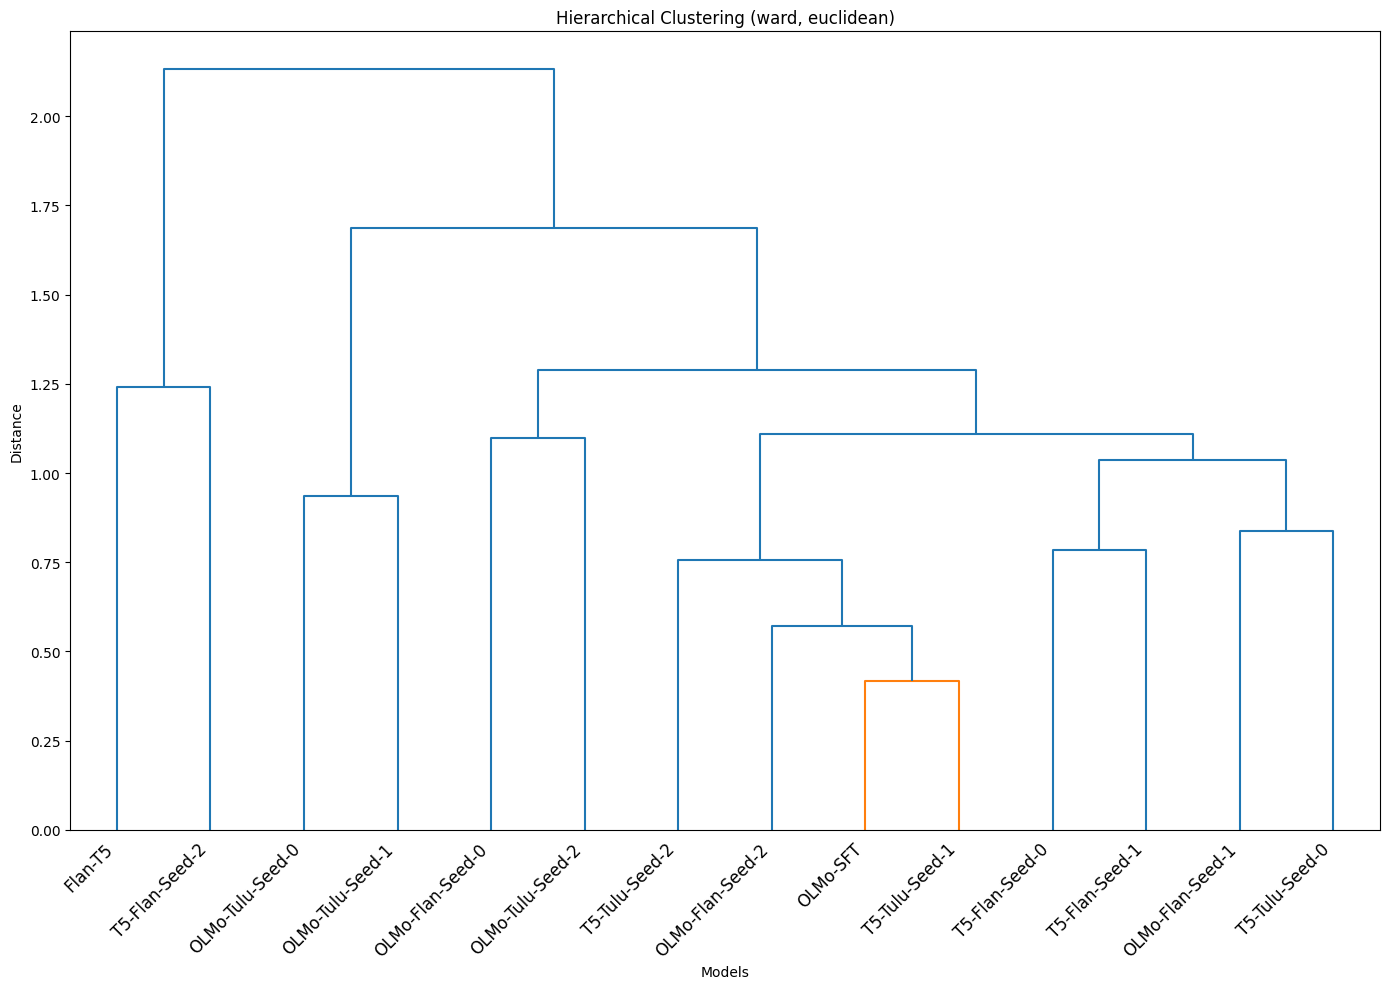

In [51]:
# Or run everything together
# analysis.run_similarity_analysis(
#     df_biasedness,
#     exclude_from_clustering=['Random'],
#     save_plots=True,
#     debug=True
# )
# Or run individual analyses:

# Just hierarchical clustering with custom parameters
cluster_data = analysis.calculate_clustering(df_biasedness, exclude_models=['Random'])
analysis.plot_clustering_analysis(
    cluster_data,
    methods=['complete', 'ward'],
    metrics=['euclidean', 'cosine'],
    n_clusters=12,
    save_plots=True,
    figsize=(14, 10),
    debug=True
)


## Supervised and Unsupervised Clustering

Preparing clustering data...
Initial shape: (451000, 4)
Preparing model metadata...
Initial shape: (450, 5)
Final shape: (15, 3)
Models: ['Flan-T5', 'OLMo-Flan-Seed-0', 'OLMo-Flan-Seed-1', 'OLMo-Flan-Seed-2', 'OLMo-SFT', 'OLMo-Tulu-Seed-0', 'OLMo-Tulu-Seed-1', 'OLMo-Tulu-Seed-2', 'Random', 'T5-Flan-Seed-0', 'T5-Flan-Seed-1', 'T5-Flan-Seed-2', 'T5-Tulu-Seed-0', 'T5-Tulu-Seed-1', 'T5-Tulu-Seed-2']
Feature matrix shape: (15, 30)
Model metadata shape: (15, 3)

Performing unsupervised clustering...

Clustering Quality Metrics for Unsupervised Clustering:
--------------------------------------------------
Silhouette Score: 0.077
  → Measures how similar points are to their own cluster vs other clusters
  → Range: [-1, 1], higher is better

Calinski-Harabasz Score: 2.152
  → Ratio of between-cluster to within-cluster dispersion
  → Higher values indicate better defined clusters

Davies-Bouldin Score: 2.212
  → Average similarity measure of each cluster with its most similar cluster
  → Range:

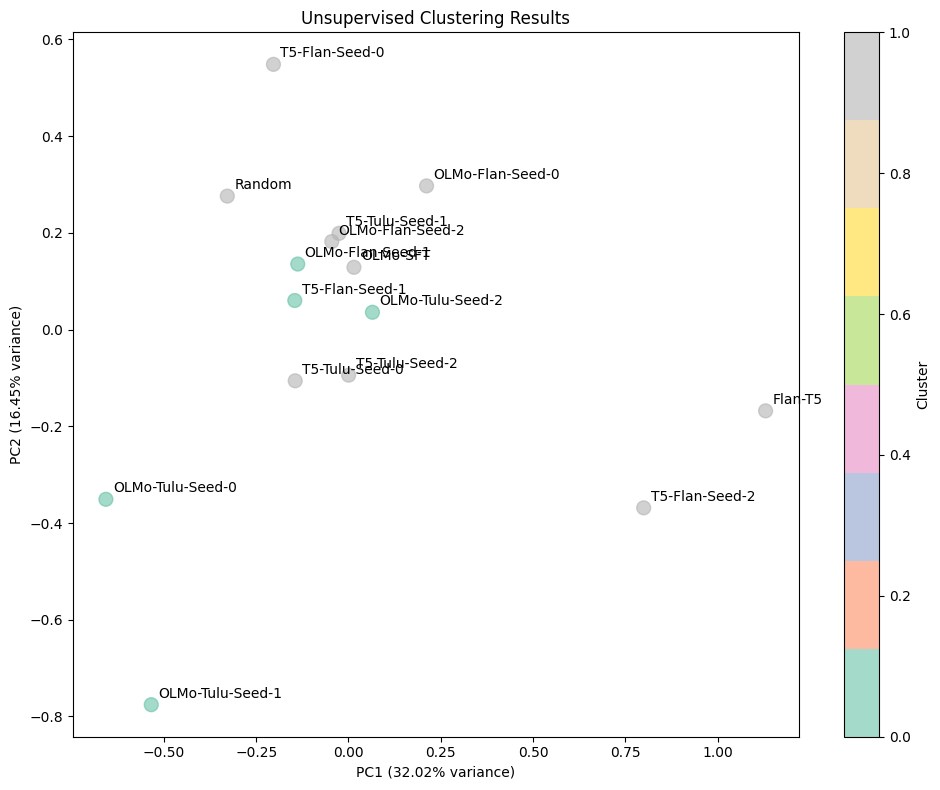

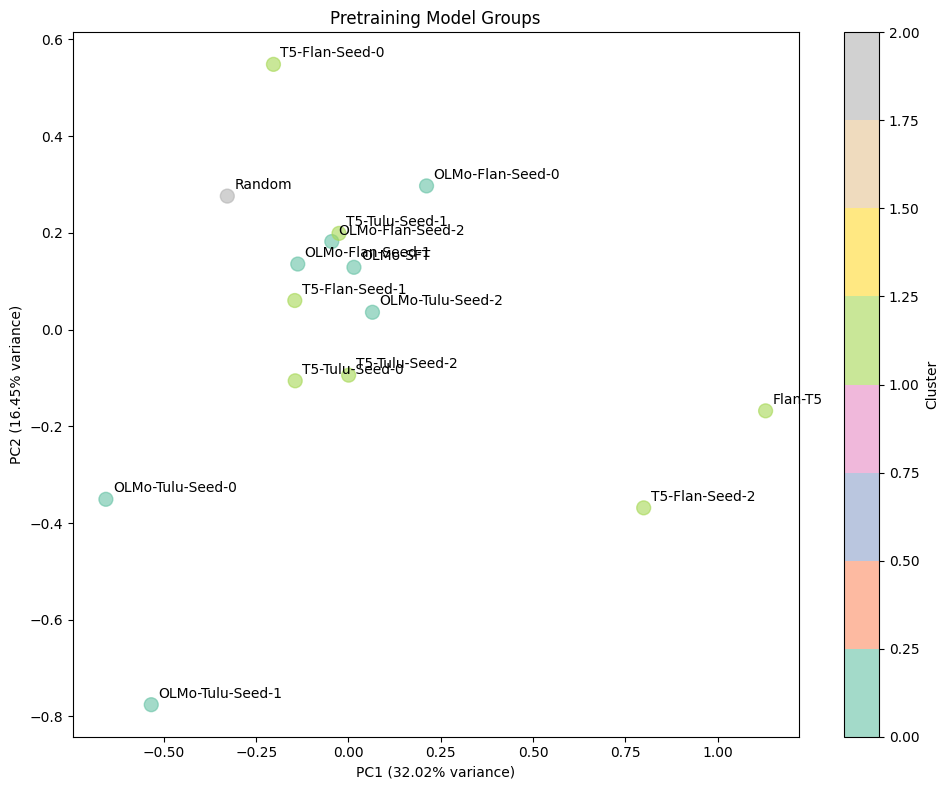

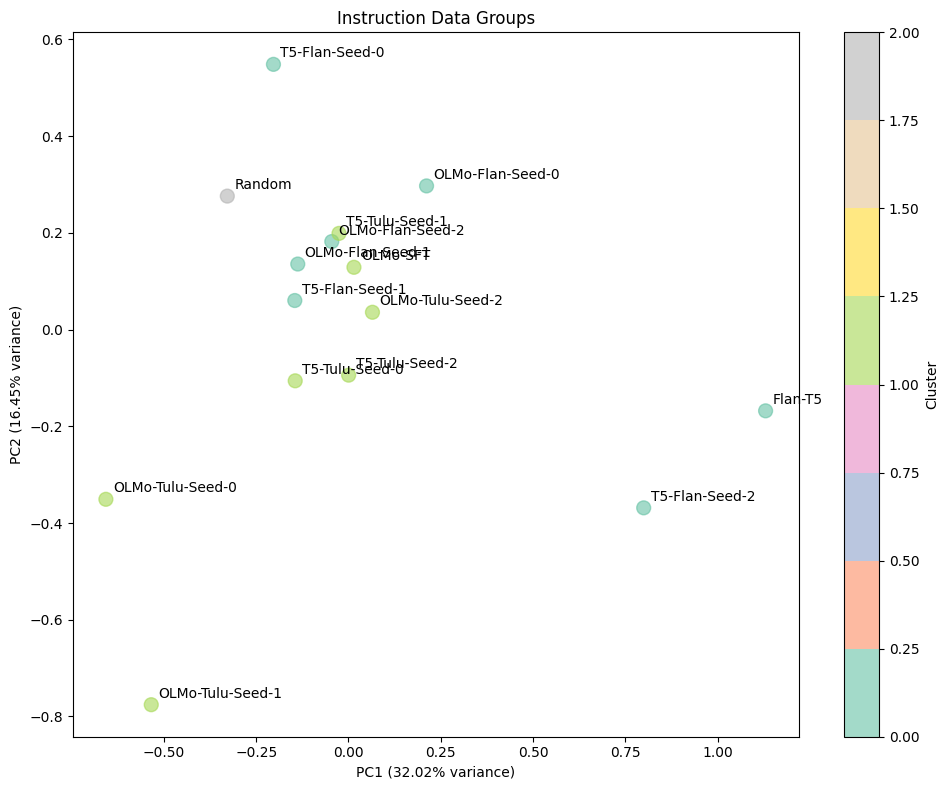

In [64]:
# Run complete analysis
# Prepare data
feature_matrix, model_metadata = analysis.prepare_clustering_data(
    df_biasedness, 
    debug=True
)

# Perform clustering
clustering_results = analysis.perform_clustering_analysis(
    feature_matrix,
    model_metadata,
    n_clusters=2,
    debug=True
)

# Create visualizations
analysis.plot_clustering_results_all(
    feature_matrix,
    clustering_results,
    model_metadata,
    save_plots=True,
    debug=True
)


Plotting raw correlation matrix...


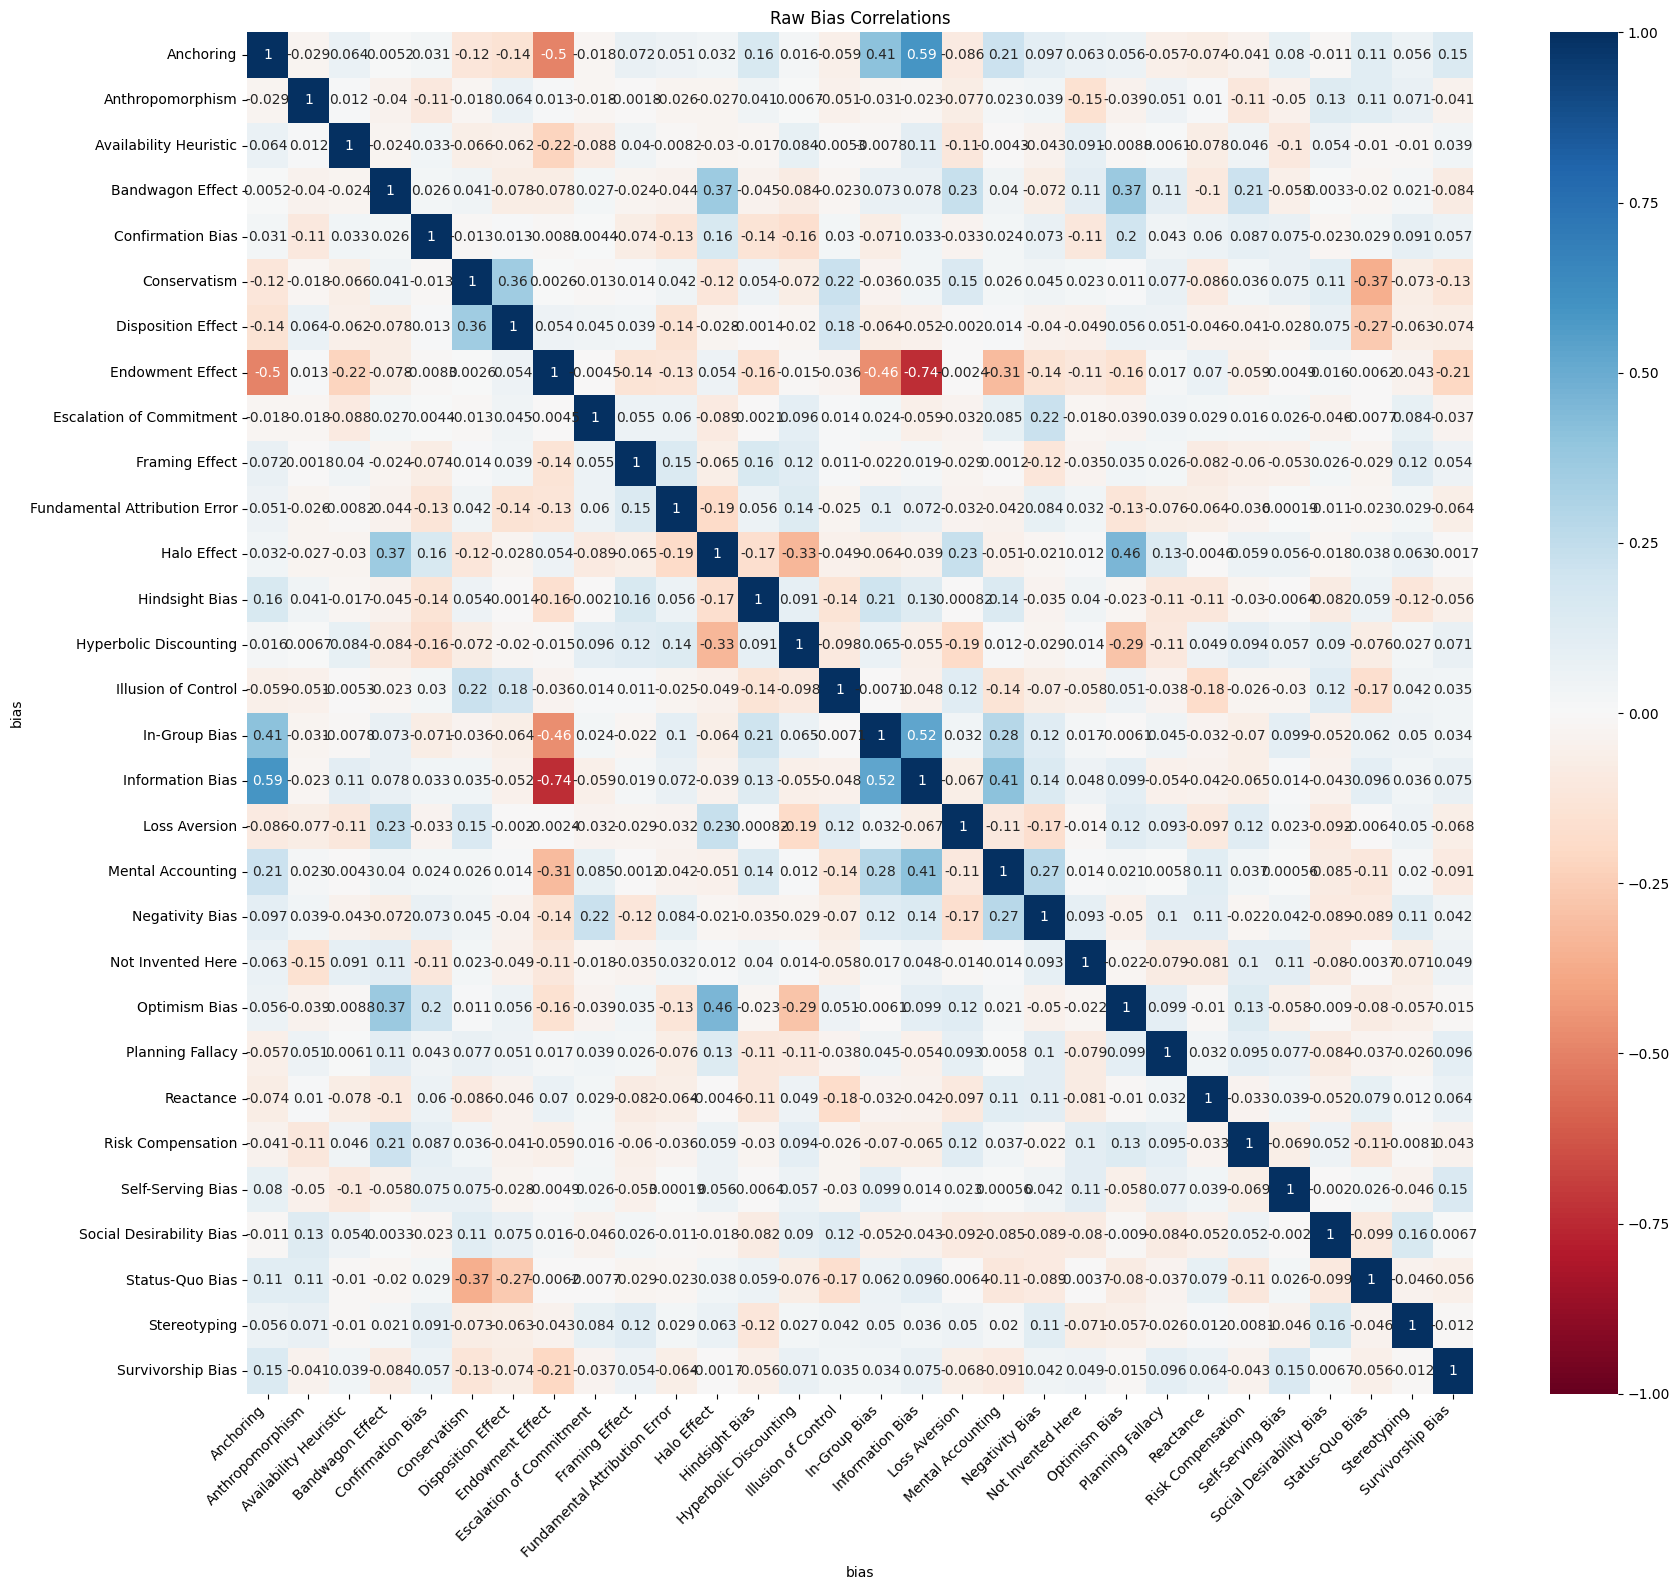


Plotting grouped correlation matrix...


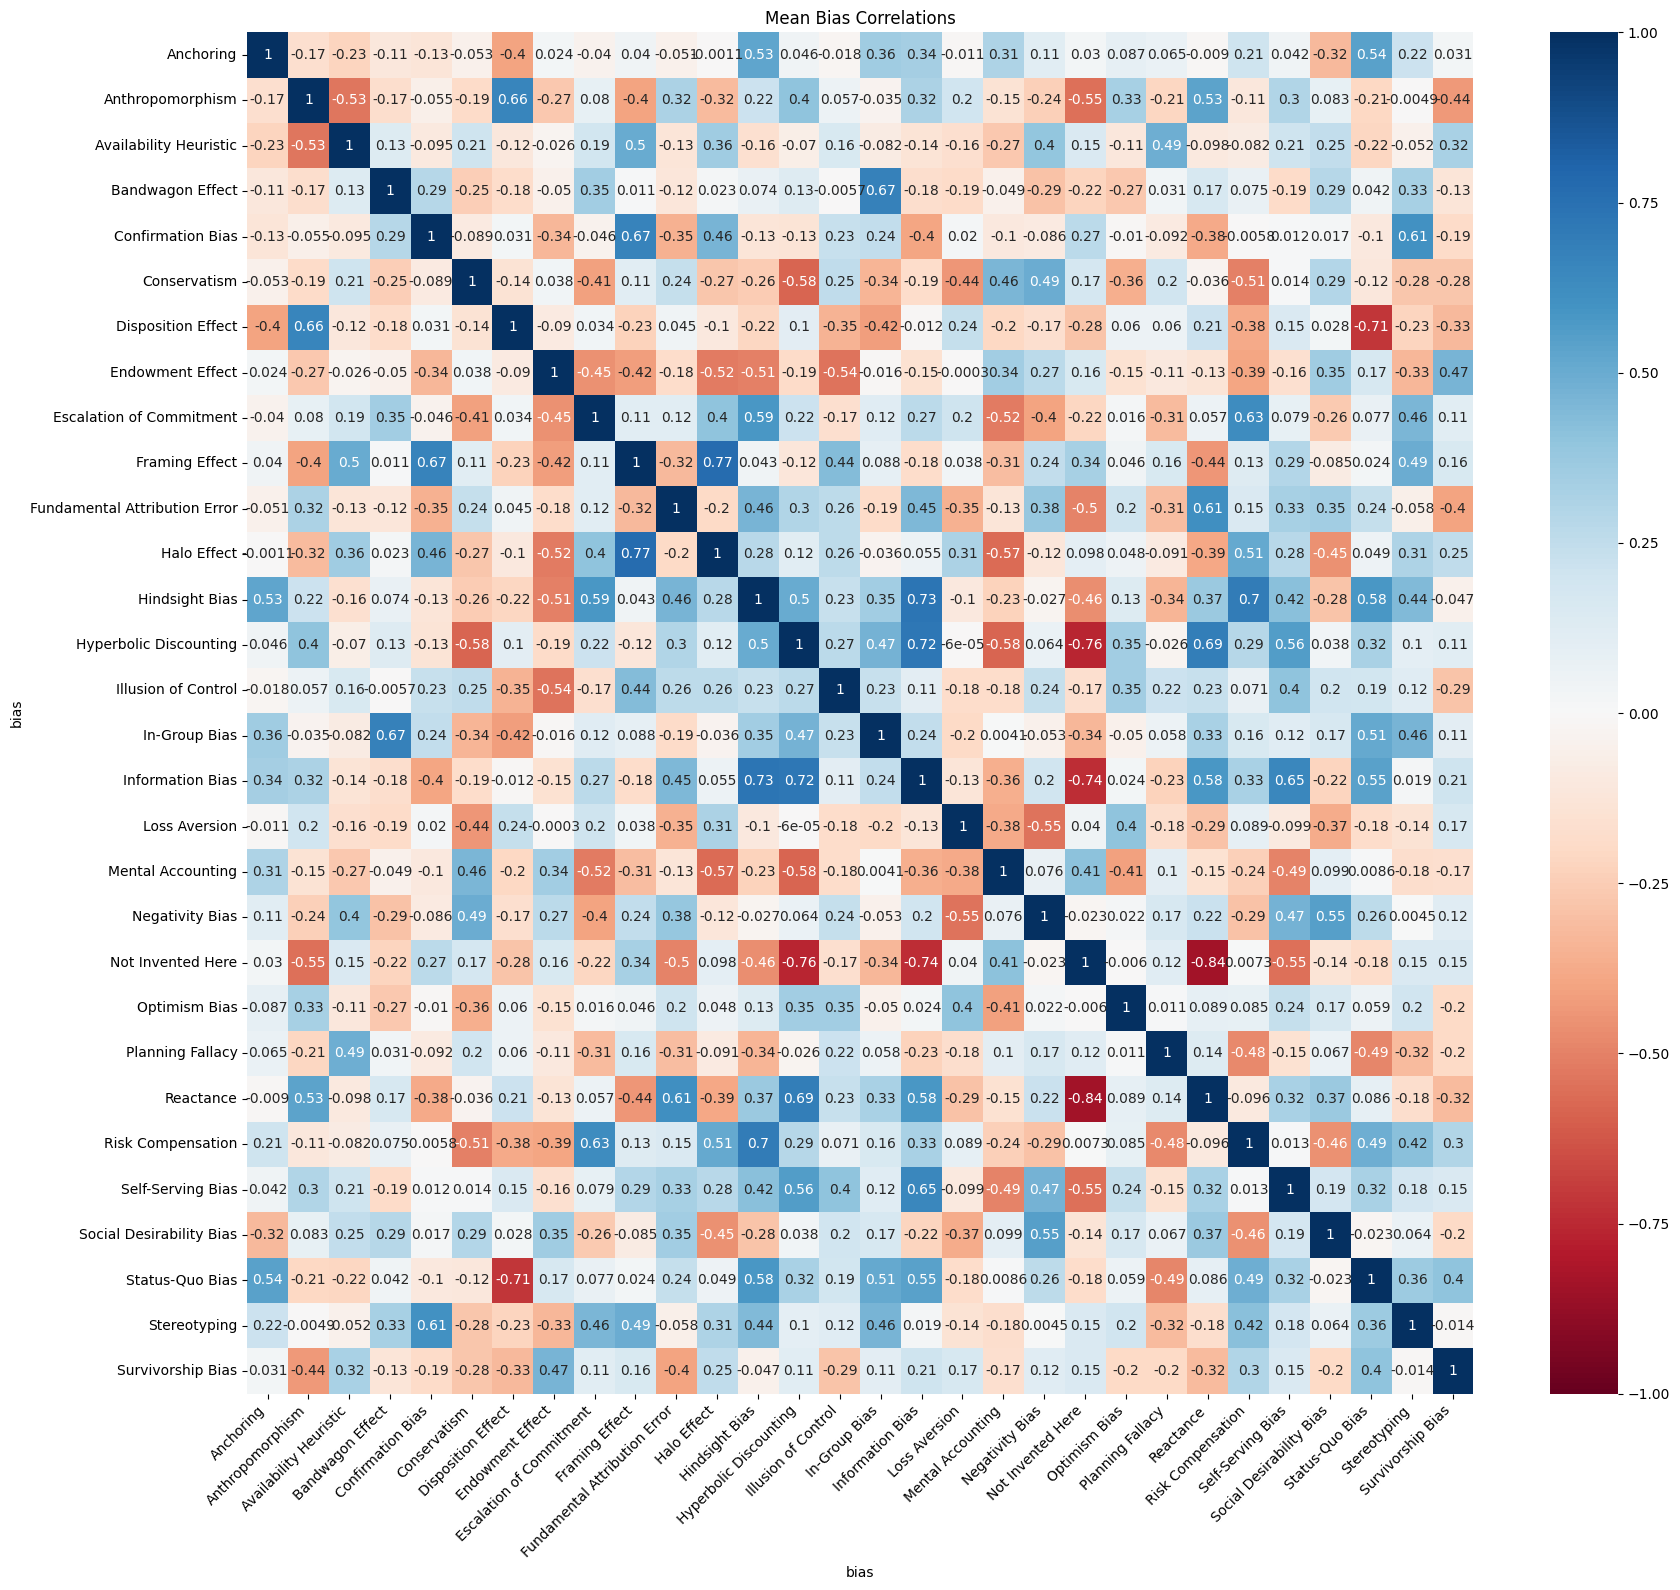


Plotting correlation matrix with dendrogram...


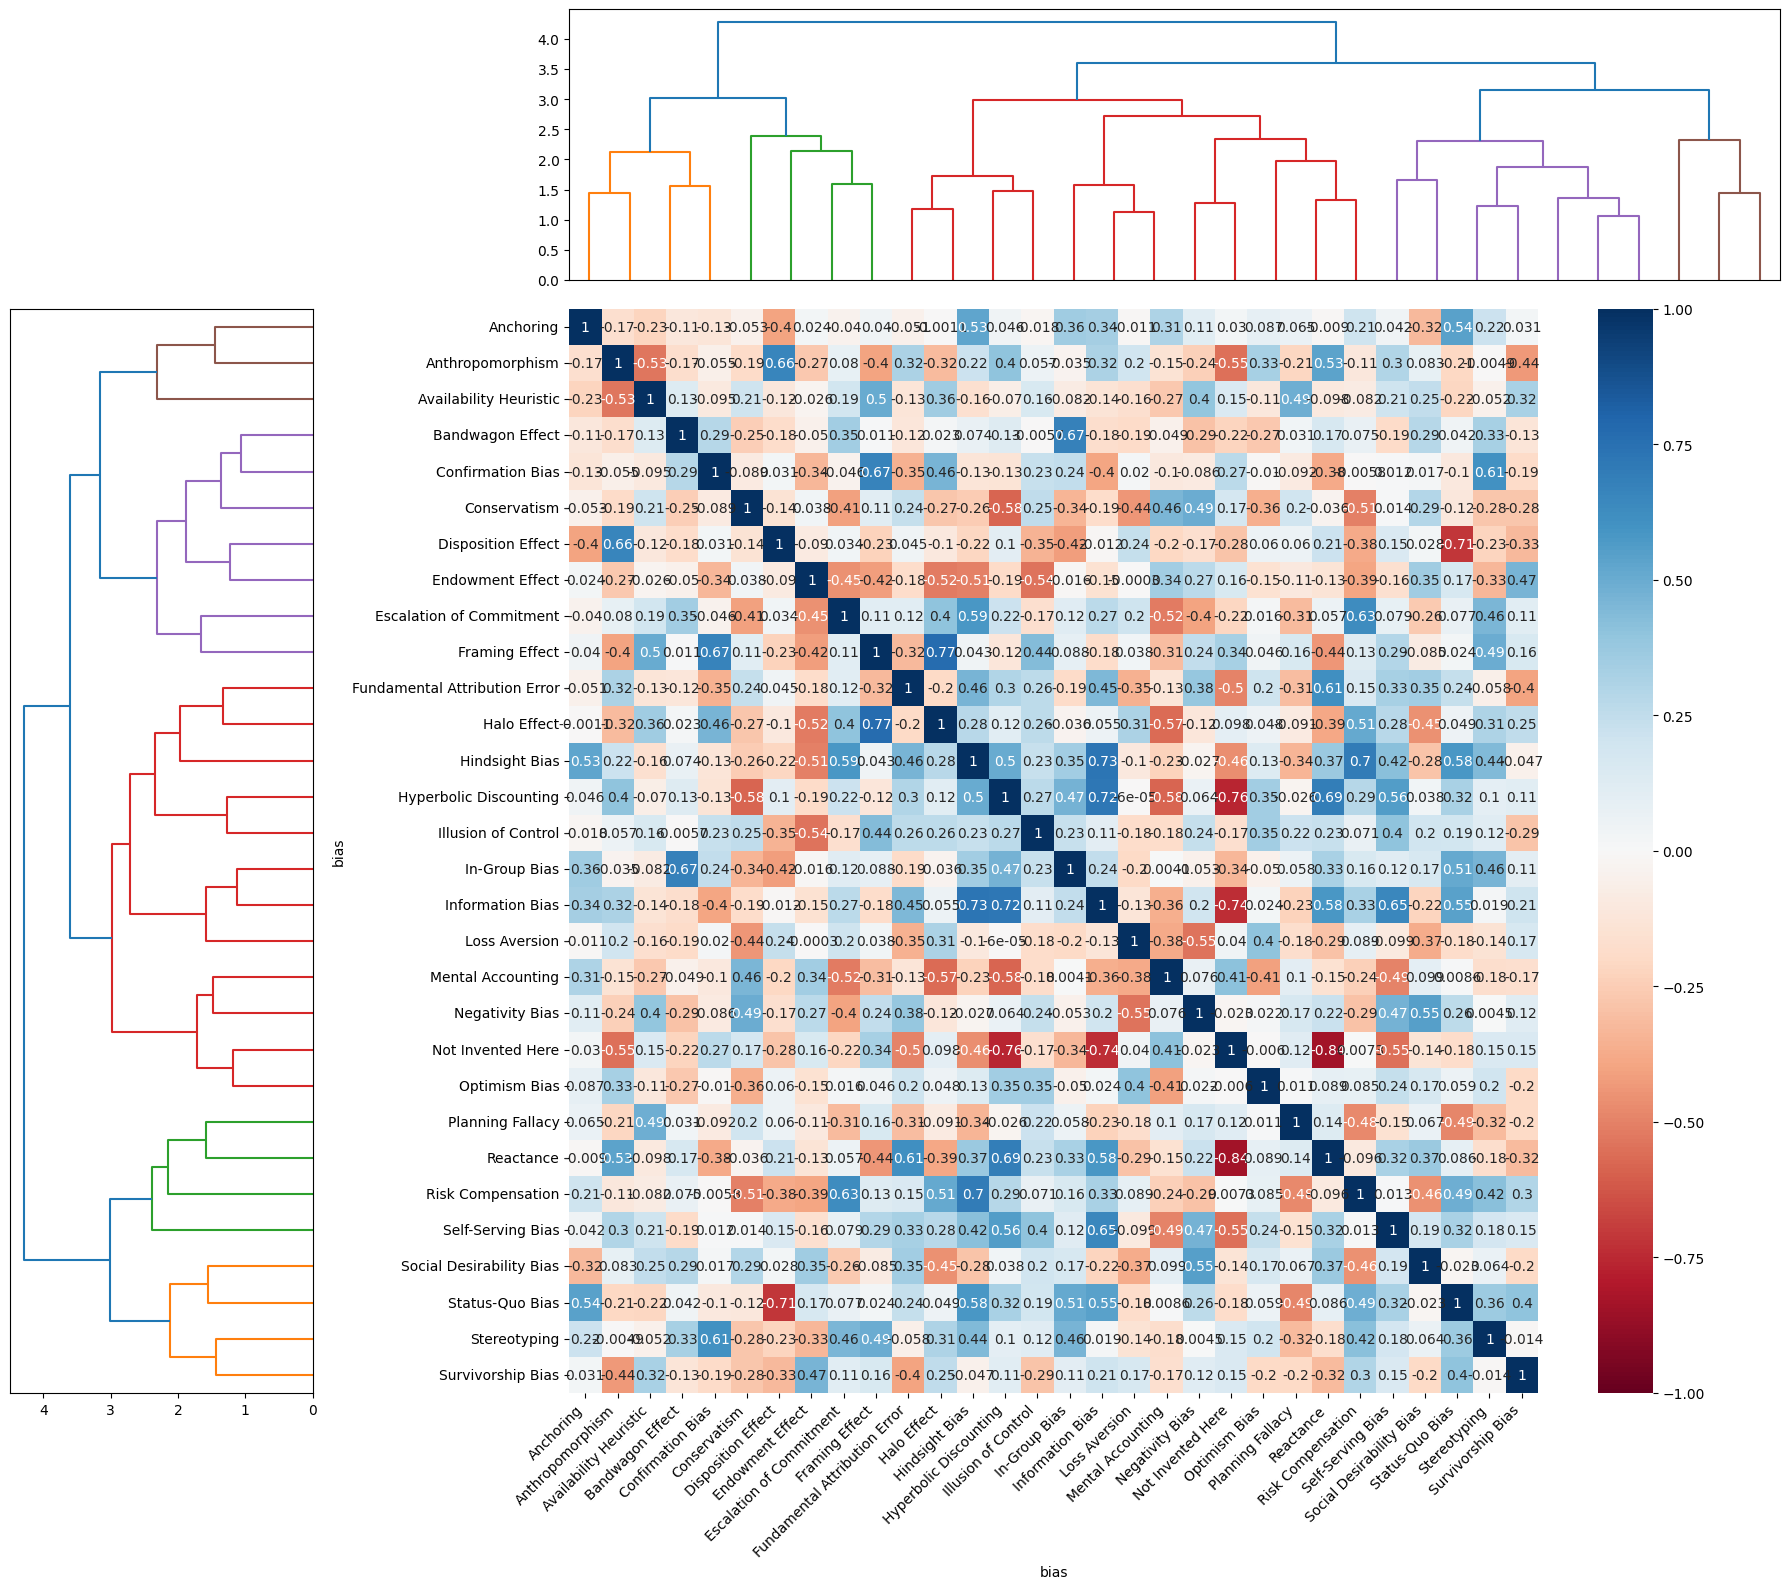

In [ ]:
# Just correlations with custom parameters
raw_corr, grouped_corr = analysis.calculate_correlation_matrices(df_biasedness)
analysis.plot_correlation_analysis(
    raw_corr, 
    grouped_corr,
    save_plots=True,
    figsize=(18, 16),
    debug=True
)

## With Error Filtering
# Group the results by models and take the mean bias for all models

In [69]:
# Load data with error filtering
df_biasedness_no_error = analysis.load_model_bias_data(
    df_decisions,
    error_threshold=500,  # Remove biases with >500 errors in any model
    debug=True
)

# Impute missing values (i.e., failed test cases)
df_biasedness_no_error = analysis.impute_missing_values(df_biasedness_no_error)


Filtering biases with error threshold: 500
Initial number of biases: 30
Biases removed due to errors: ['Anchoring', 'Anthropomorphism', 'Availability Heuristic', 'Endowment Effect', 'Escalation of Commitment', 'Fundamental Attribution Error', 'Halo Effect', 'Hindsight Bias', 'Information Bias', 'Loss Aversion', 'Negativity Bias', 'Optimism Bias', 'Planning Fallacy', 'Reactance', 'Social Desirability Bias', 'Stereotyping']
Final number of biases: 14


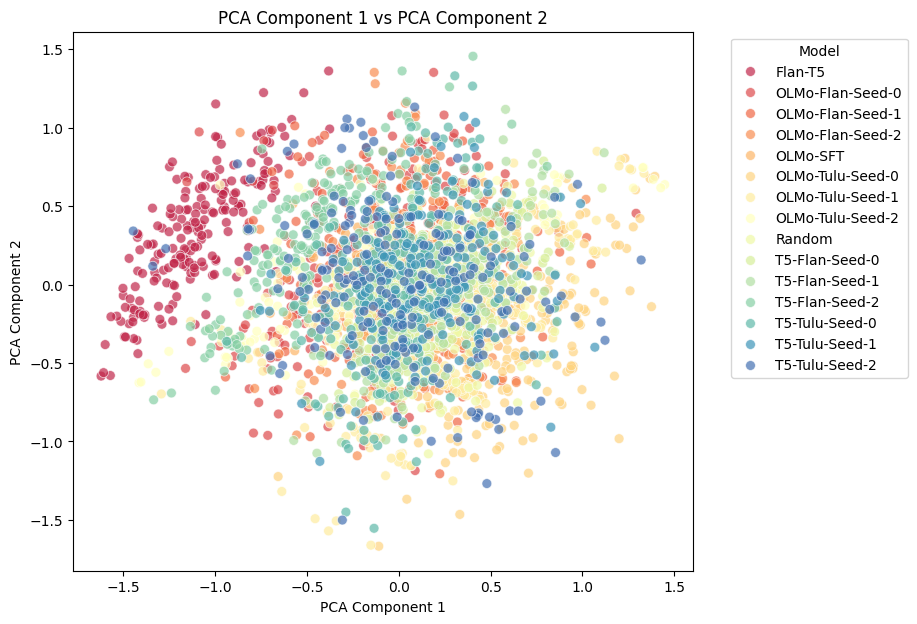

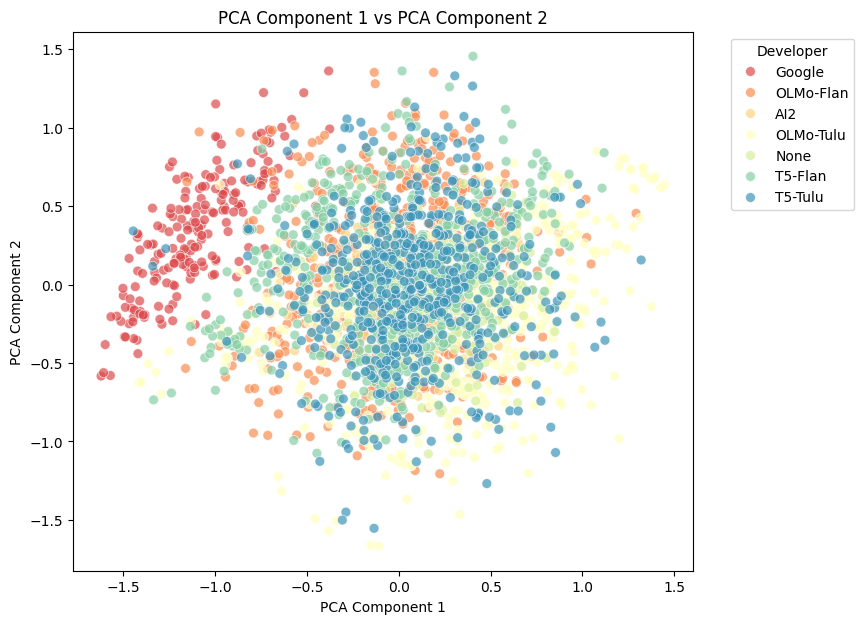

In [70]:
# Prepare dimensionality reduction of data
df_pca_no_error = analysis.reduce_with_pca(df_biasedness_no_error)

# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca_no_error.copy()
df_scatter["Model"] = df_scatter["model"]
analysis.plot_scatter(df_scatter, label="Model", plot_type="pca", save_plot=True)

# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca_no_error.copy()  # Make a copy to avoid modifying original
df_scatter["Developer"] = df_scatter["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", save_plot=False)

/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/itay.itzhak/miniconda3/envs/cogeval/lib/python3.10/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


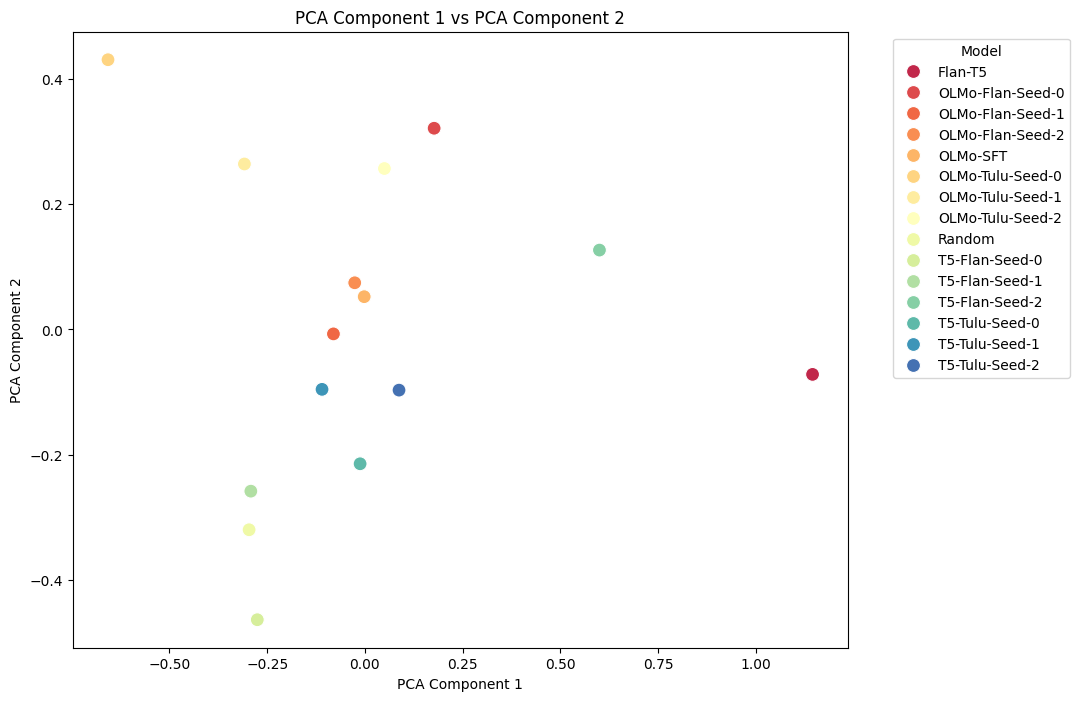

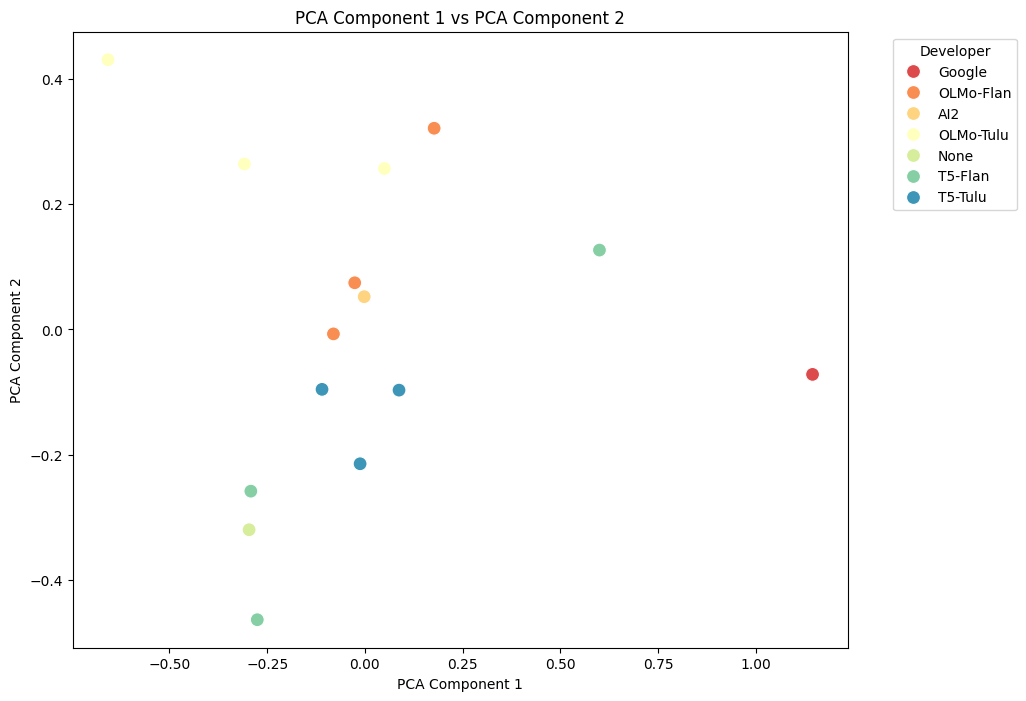

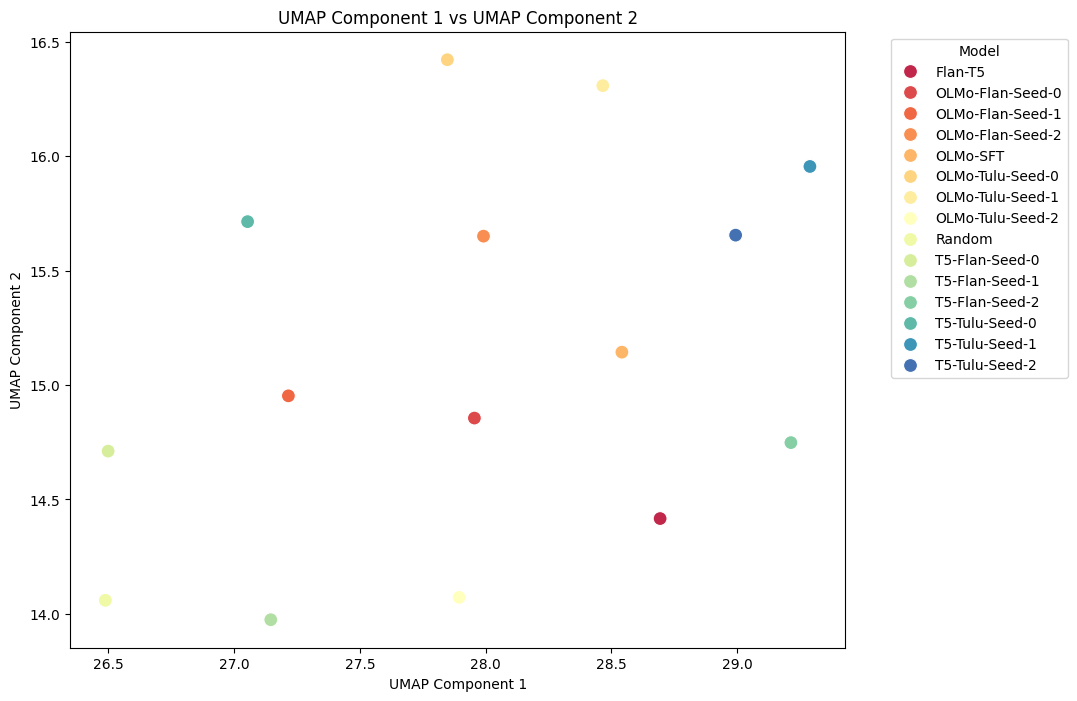

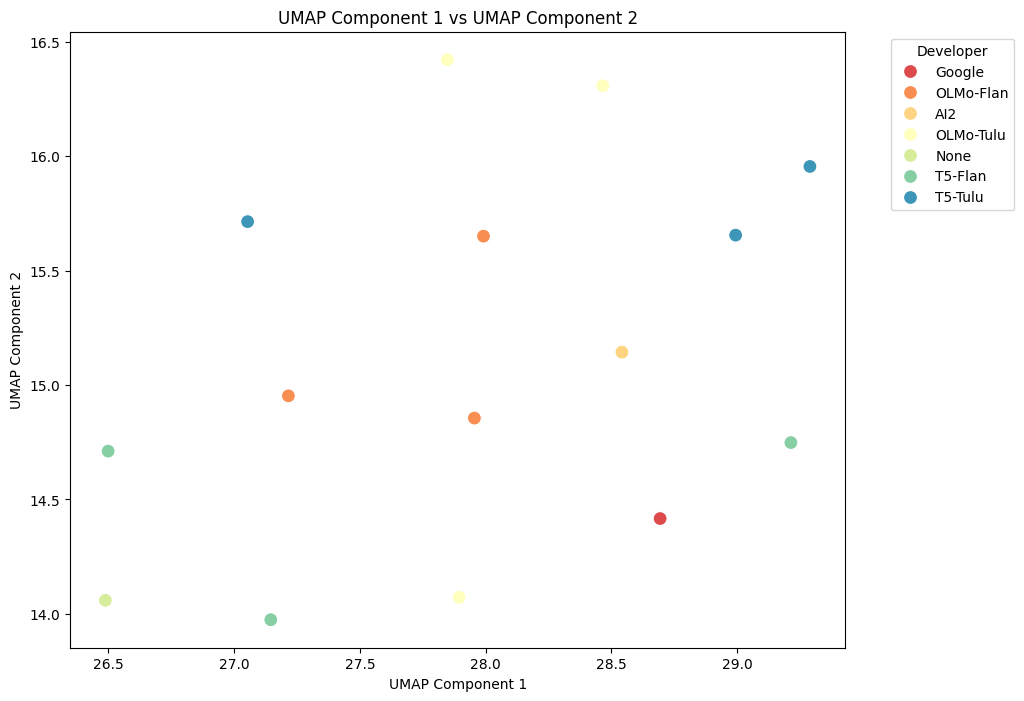

In [71]:
# Calculate embeddings once
df_pca_no_error, df_umap_no_error = analysis.calculate_model_embeddings(df_biasedness_no_error, debug=False)

# Then create different plots with different parameters

# Plot 2 - Large dots
analysis.plot_model_embeddings(
    df_pca_no_error, 
    df_umap_no_error,
    dot_size=100,
    dot_alpha=1.0,
    figsize=(10, 8)
)


Plotting dendrogram with method=complete, metric=euclidean


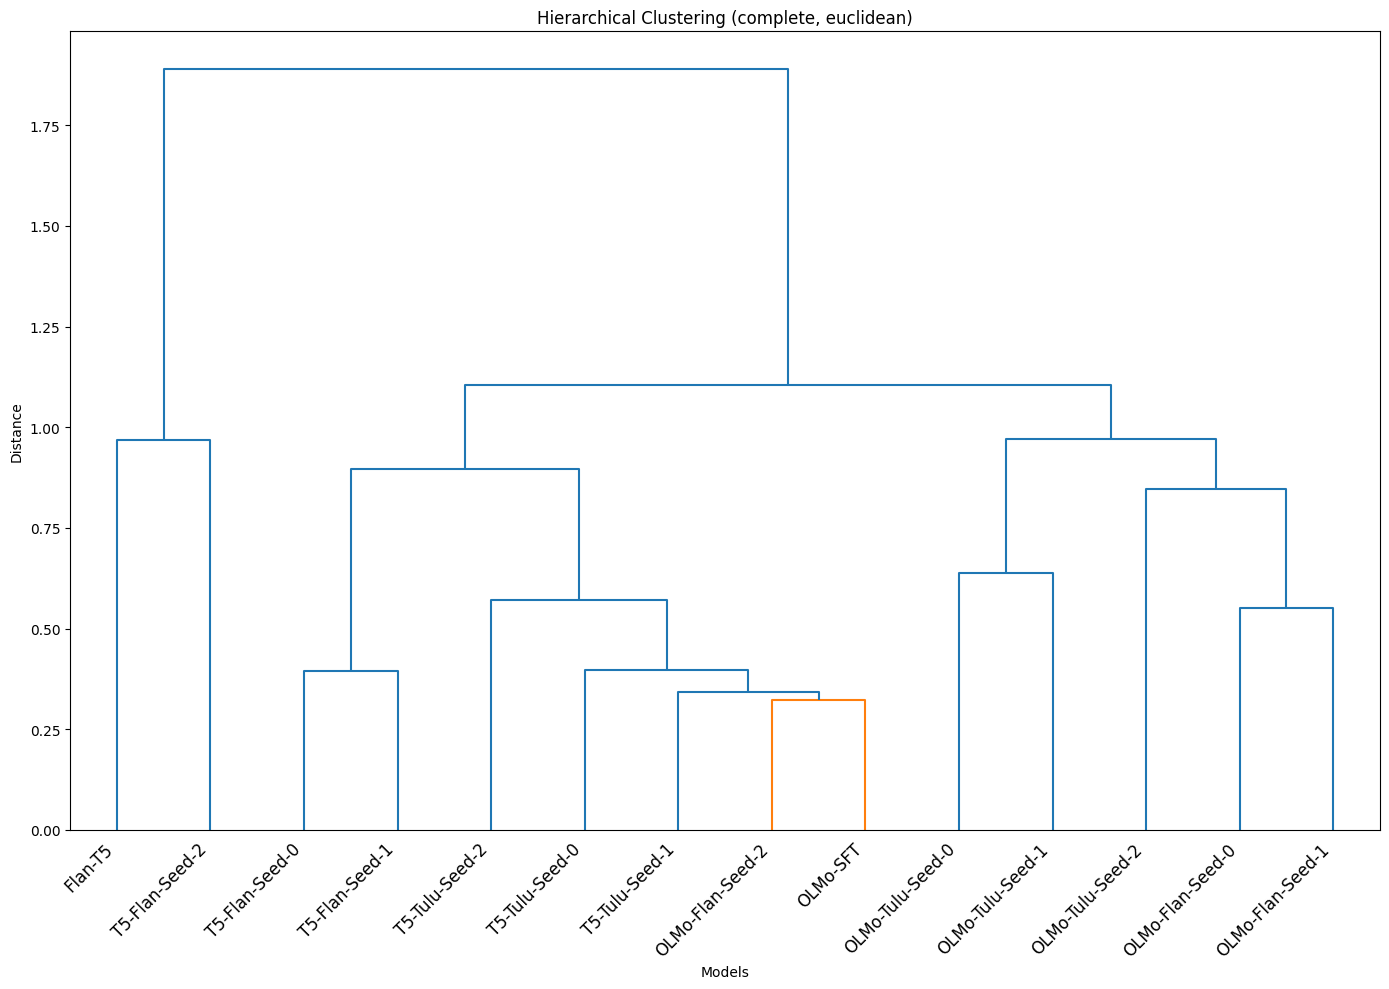


Plotting dendrogram with method=complete, metric=cosine


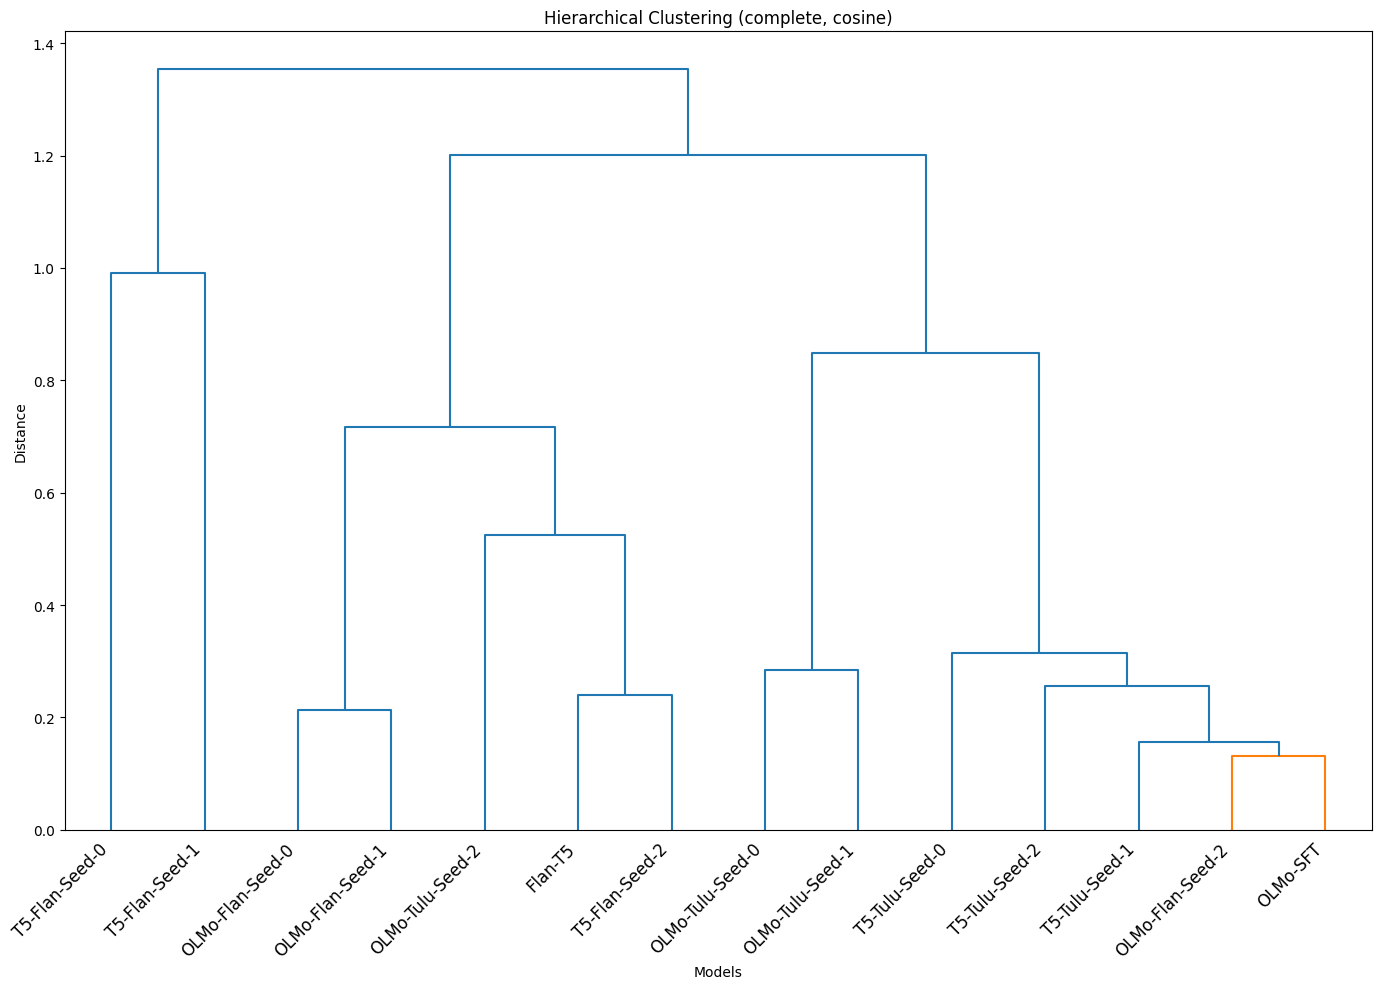


Plotting dendrogram with method=ward, metric=euclidean


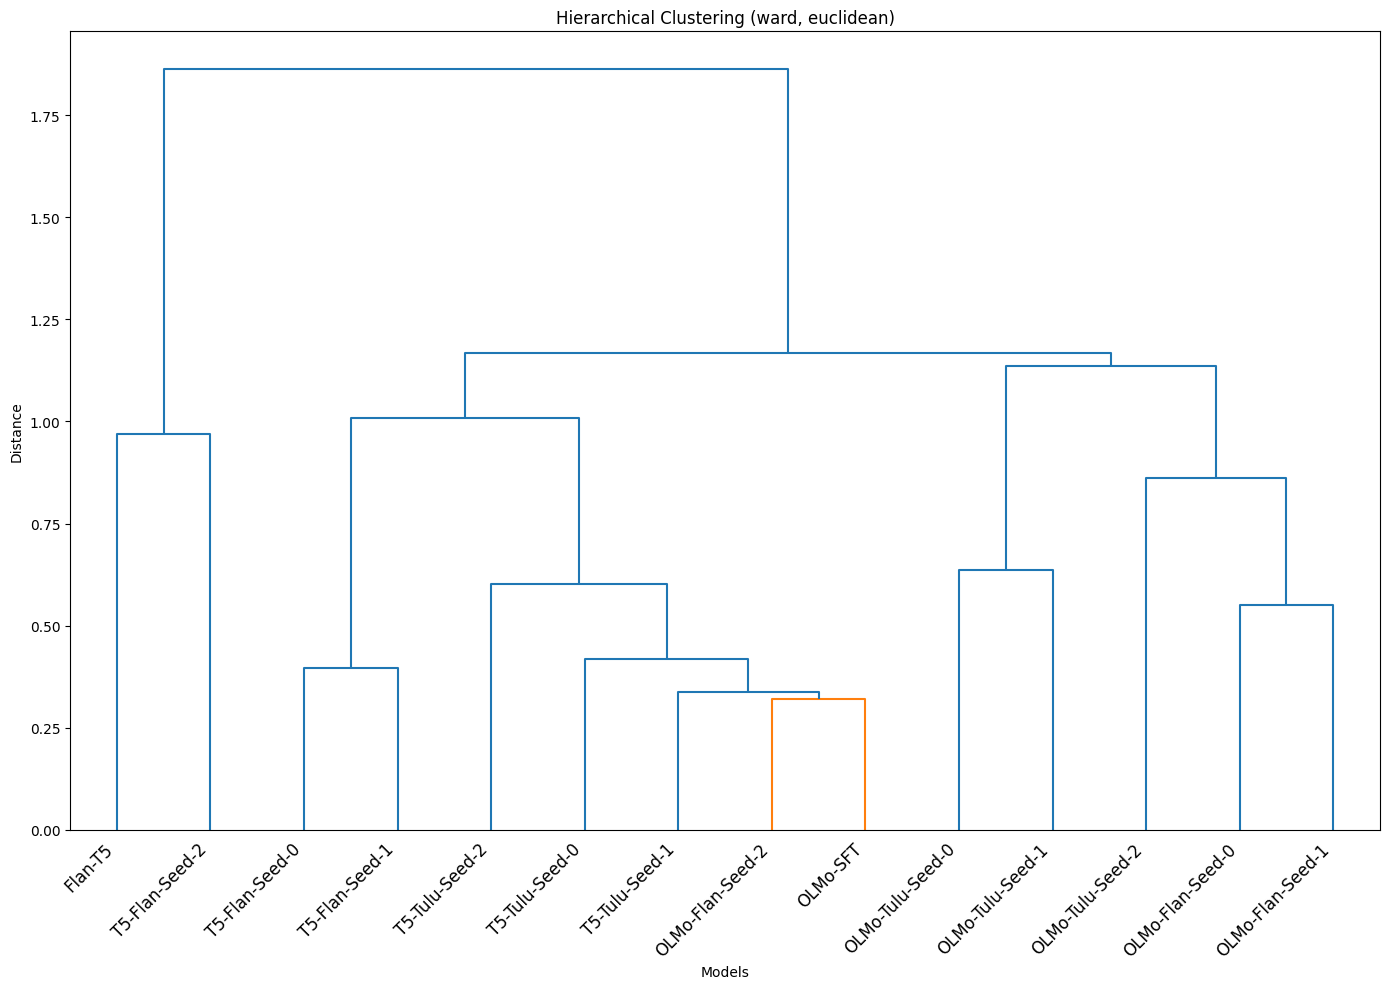

In [72]:
# Just clustering with custom parameters
cluster_data_no_error = analysis.calculate_clustering(df_biasedness_no_error, exclude_models=['Random'])
analysis.plot_clustering_analysis(
    cluster_data_no_error,
    methods=['complete', 'ward'],
    metrics=['euclidean', 'cosine'],
    n_clusters=12,
    save_plots=True,
    figsize=(14, 10),
    debug=True
)

Preparing clustering data...
Initial shape: (211000, 4)
Preparing model metadata...
Initial shape: (210, 5)
Final shape: (15, 3)
Models: ['Flan-T5', 'OLMo-Flan-Seed-0', 'OLMo-Flan-Seed-1', 'OLMo-Flan-Seed-2', 'OLMo-SFT', 'OLMo-Tulu-Seed-0', 'OLMo-Tulu-Seed-1', 'OLMo-Tulu-Seed-2', 'Random', 'T5-Flan-Seed-0', 'T5-Flan-Seed-1', 'T5-Flan-Seed-2', 'T5-Tulu-Seed-0', 'T5-Tulu-Seed-1', 'T5-Tulu-Seed-2']
Feature matrix shape: (15, 14)
Model metadata shape: (15, 3)

Performing unsupervised clustering...

Clustering Quality Metrics for Unsupervised Clustering:
--------------------------------------------------
Silhouette Score: 0.131
  → Measures how similar points are to their own cluster vs other clusters
  → Range: [-1, 1], higher is better

Calinski-Harabasz Score: 3.684
  → Ratio of between-cluster to within-cluster dispersion
  → Higher values indicate better defined clusters

Davies-Bouldin Score: 1.778
  → Average similarity measure of each cluster with its most similar cluster
  → Range:

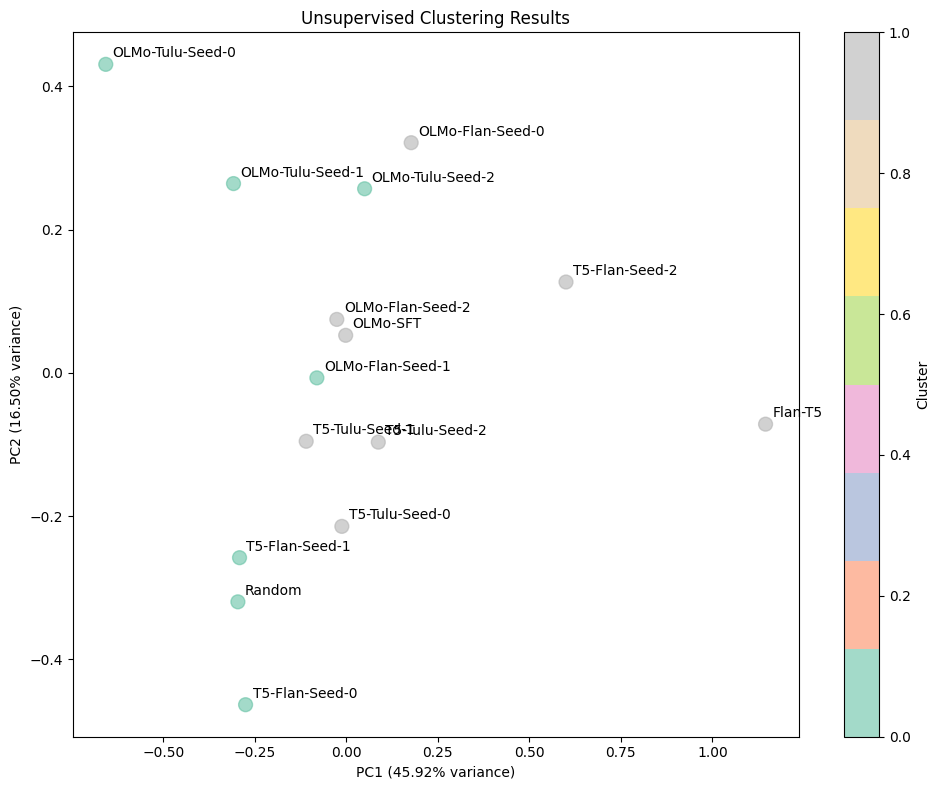

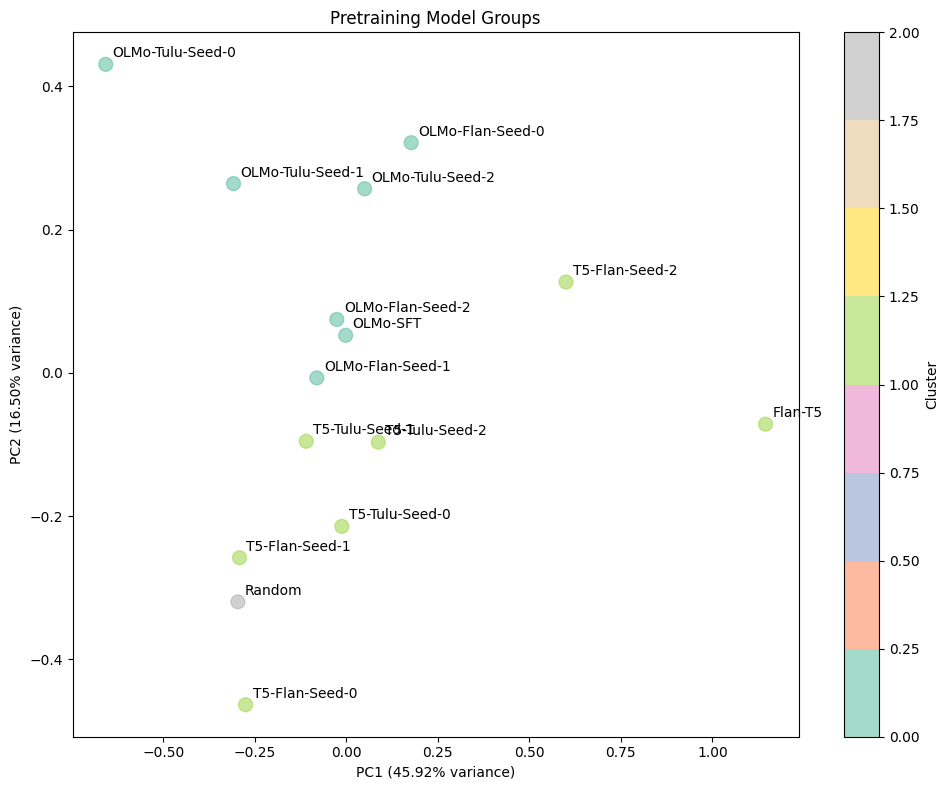

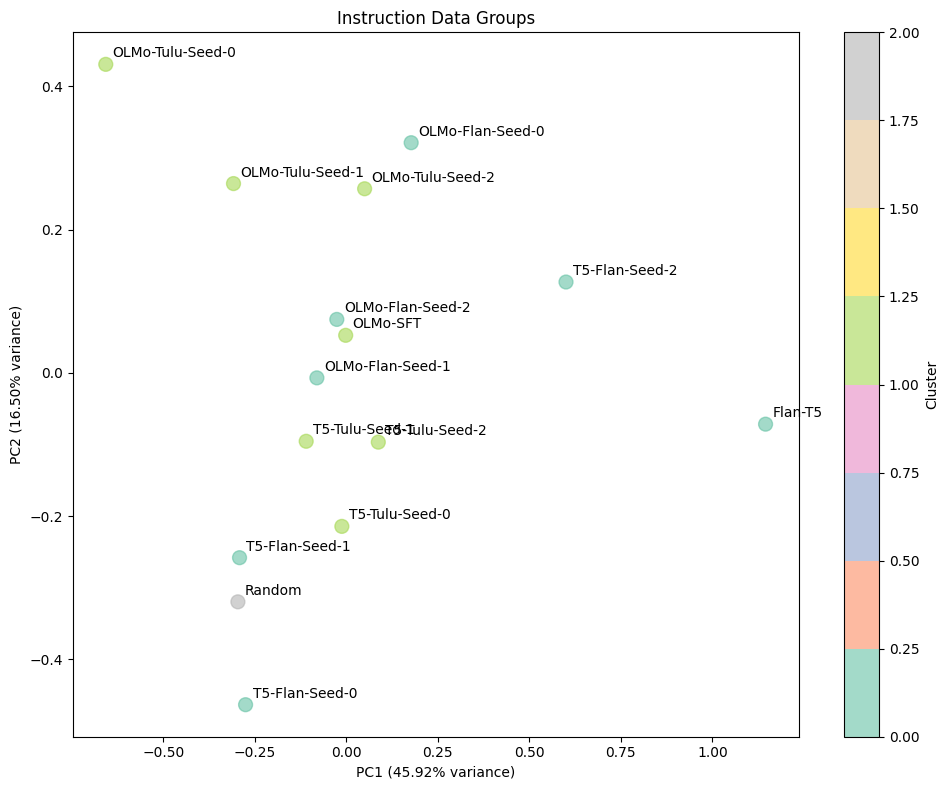

In [73]:
# Run complete analysis
# Prepare data
feature_matrix_no_error, model_metadata_no_error = analysis.prepare_clustering_data(
    df_biasedness_no_error, 
    debug=True
)

# Perform clustering
clustering_results_no_error = analysis.perform_clustering_analysis(
    feature_matrix_no_error,
    model_metadata_no_error,
    n_clusters=2,
    debug=True
)

# Create visualizations
analysis.plot_clustering_results_all(
    feature_matrix_no_error,
    clustering_results_no_error,
    model_metadata_no_error,
    save_plots=True,
    debug=True
)

In [36]:
# Group the results by models and take the mean bias for all models
df_biasedness_grouped = analysis.group_by(df_biasedness, "model")

In [41]:
# Prepare dimensionality reduction of data
df_pca = analysis.reduce_with_pca(df_biasedness_grouped, group_by="model")
df_umap = analysis.reduce_with_umap(df_biasedness_grouped, group_by="model")  


DEBUG: Initial dataframe:
Shape: (15, 2)
Columns: ['model', 'individual_score']
Number of unique models: 15
Unique models: ['Flan-T5' 'OLMo-Flan-Seed-0' 'OLMo-Flan-Seed-1' 'OLMo-Flan-Seed-2'
 'OLMo-SFT' 'OLMo-Tulu-Seed-0' 'OLMo-Tulu-Seed-1' 'OLMo-Tulu-Seed-2'
 'Random' 'T5-Flan-Seed-0' 'T5-Flan-Seed-1' 'T5-Flan-Seed-2'
 'T5-Tulu-Seed-0' 'T5-Tulu-Seed-1' 'T5-Tulu-Seed-2']


KeyError: 'bias'

In [38]:
# Perform PCA and create a scatter plot showing the models
df_scatter = df_pca
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

TypeError: plot_scatter() got an unexpected keyword argument 'dot_size'

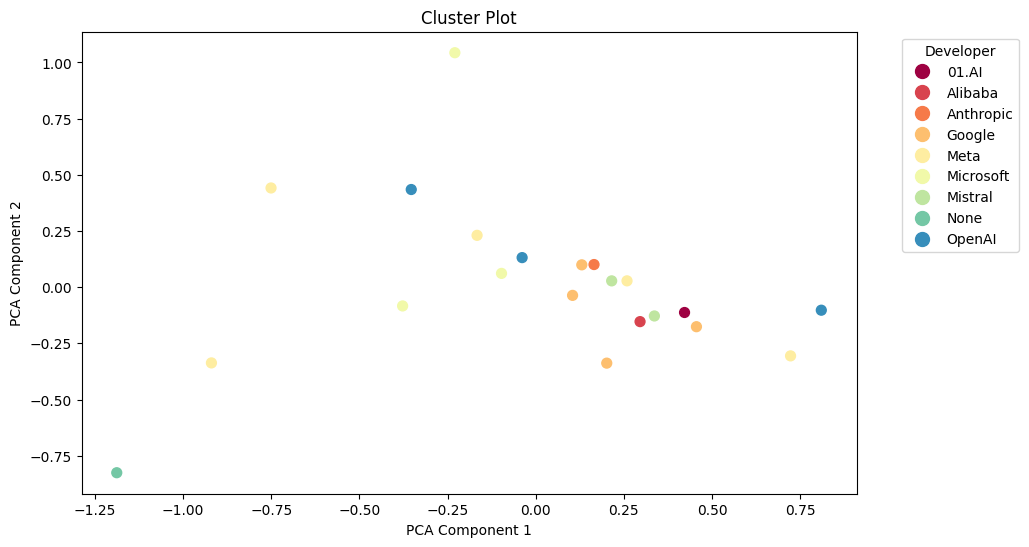

In [16]:
# Perform PCA and create a scatter plot showing the model developers
df_scatter = df_pca
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

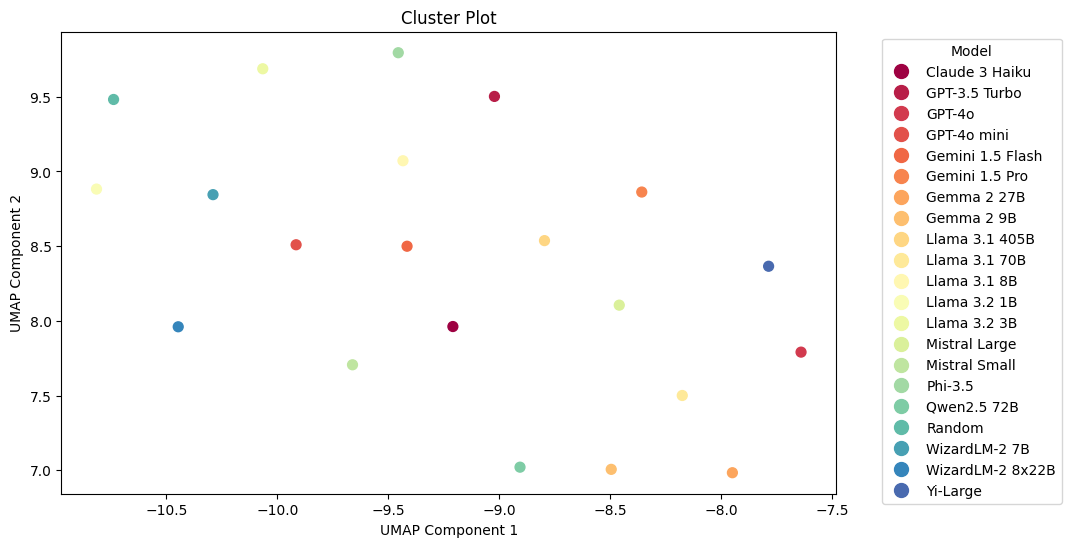

In [17]:
# Perform UMAP and create a scatter plot showing the models
df_scatter = df_umap
df_scatter["Model"] = df_biasedness_grouped["model"]
analysis.plot_scatter(df_scatter, label="Model", dot_size=50, dot_alpha=1.0, save_plot=False)

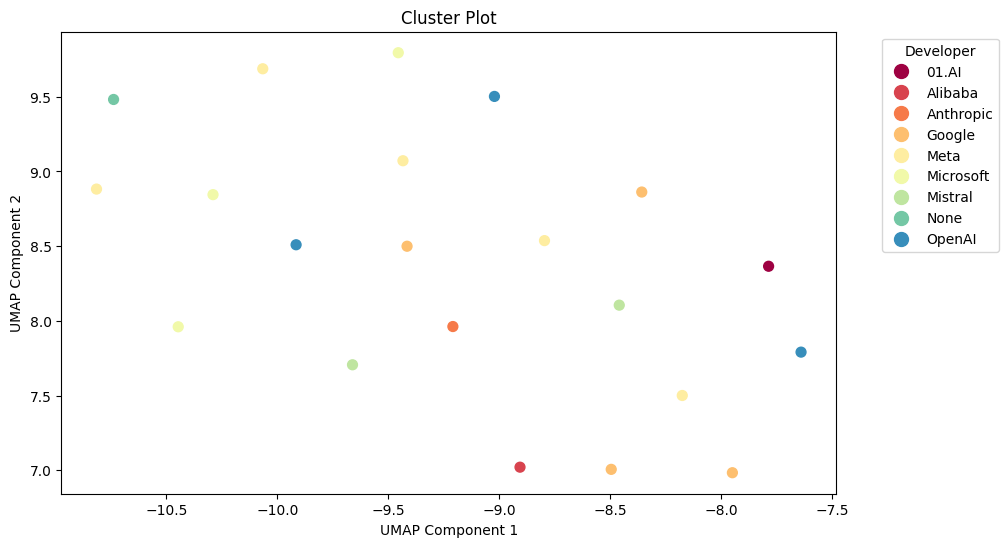

In [18]:
# Perform UMAP and create a scatter plot showing the model developers
df_scatter = df_umap
df_scatter["Developer"] = df_biasedness_grouped["model"].map(analysis.MODEL_DEVELOPER_MAPPING)
analysis.plot_scatter(df_scatter, label="Developer", dot_size=50, dot_alpha=1.0, save_plot=False)

### Plot Dendrograms of Models

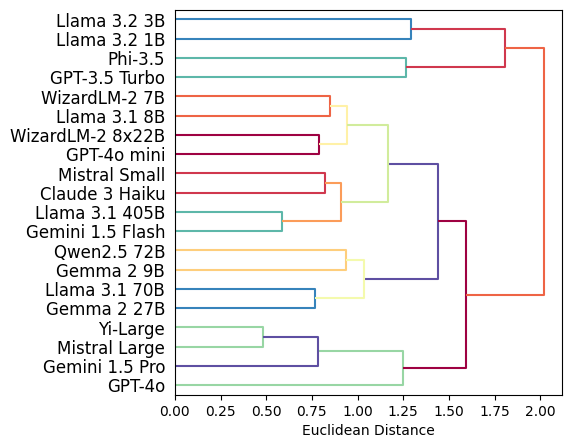

In [19]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='complete', metric='euclidean', n_clusters=12, save_plot=True)

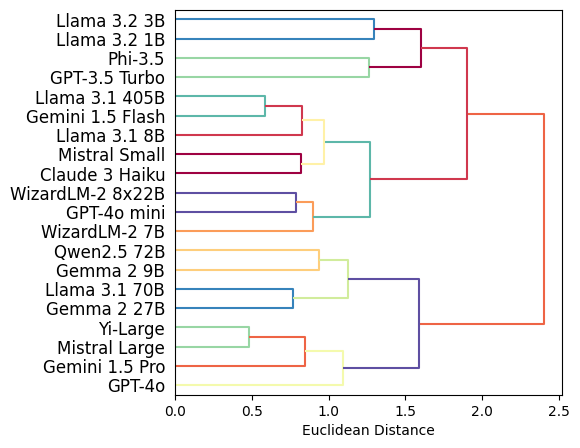

In [20]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='ward', metric='euclidean', n_clusters=12, save_plot=False)

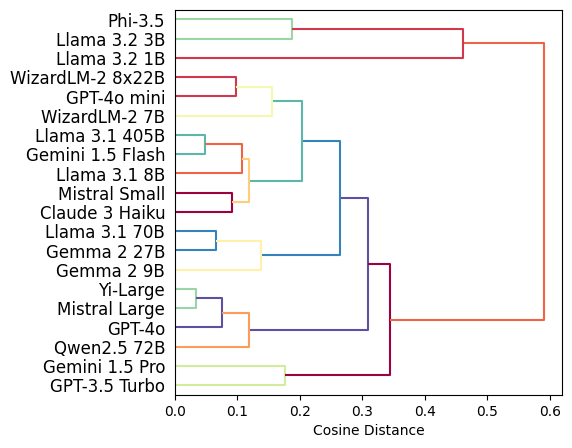

In [21]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='complete', metric='cosine', n_clusters=12, save_plot=False)

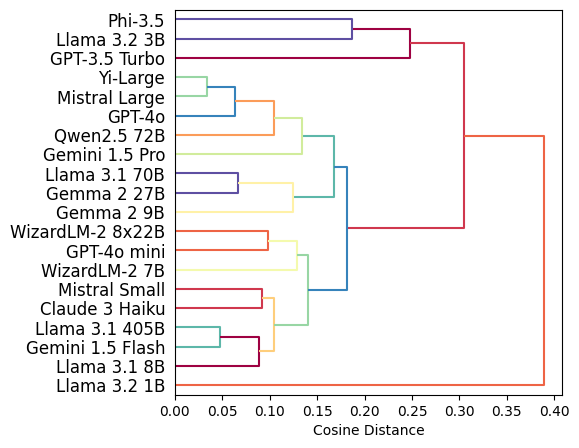

In [22]:
analysis.plot_dendrogram(df_biasedness_grouped[df_biasedness_grouped["model"] != "Random"], "model", method='average', metric='cosine', n_clusters=12, save_plot=False)

### Correlation of Biases

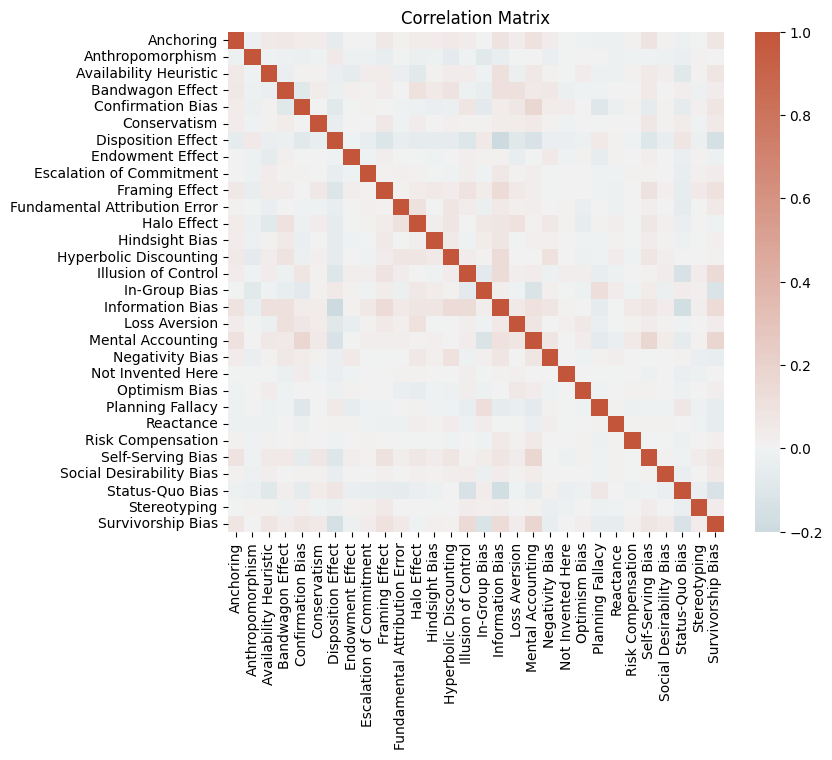

In [23]:
# Plot a correlation matrix of all bias values
analysis.plot_correlation_matrix(df_biasedness, save_plot=False)

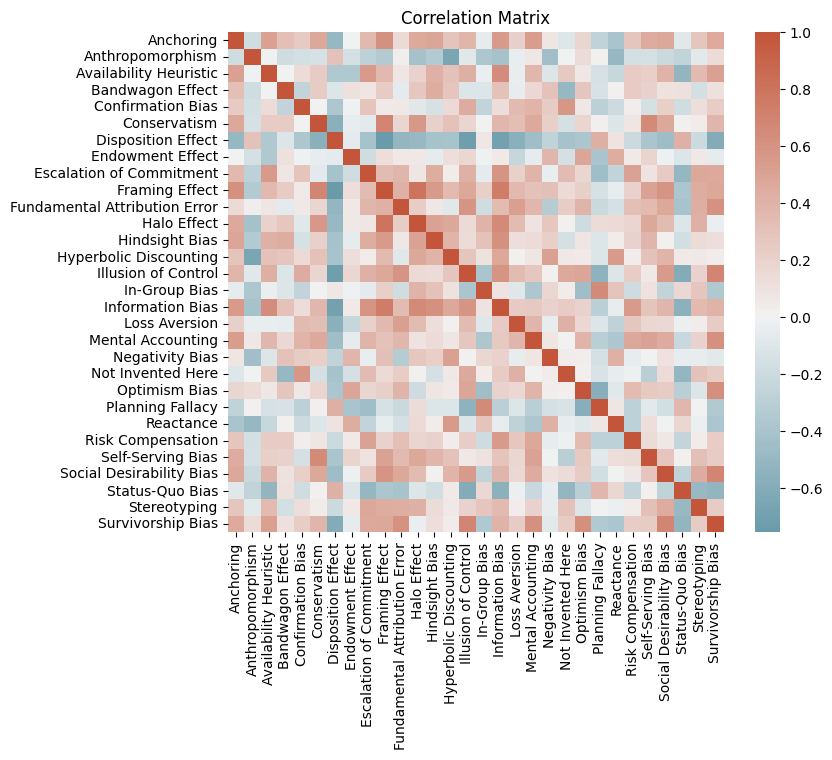

In [24]:
# Plot a correlation matrix of the mean bias values
analysis.plot_correlation_matrix(df_biasedness_grouped, save_plot=True)

<Figure size 800x650 with 0 Axes>

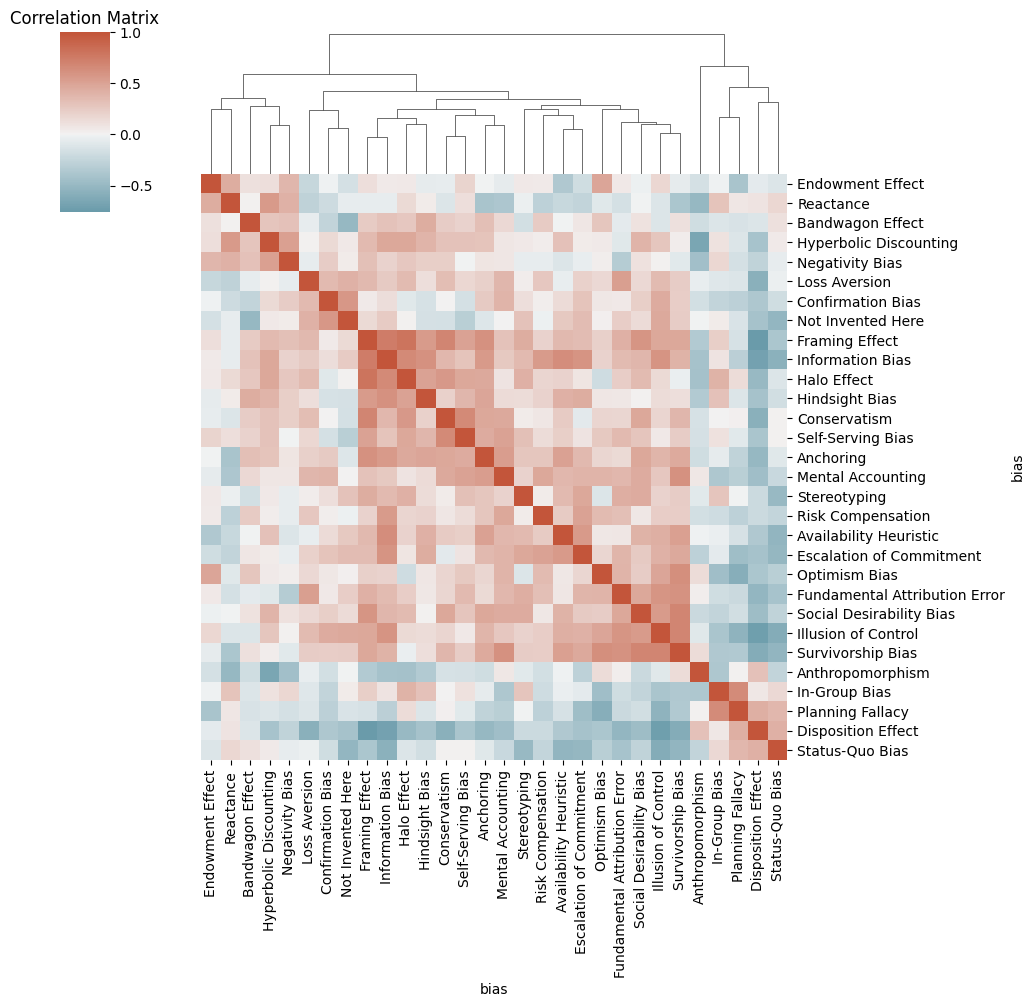

In [25]:
# Plot a correlation matrix with a connected dendrogram
analysis.plot_correlation_matrix_with_dendrogram(df_biasedness_grouped, save_plot=False)

### Bubble Plot of Models

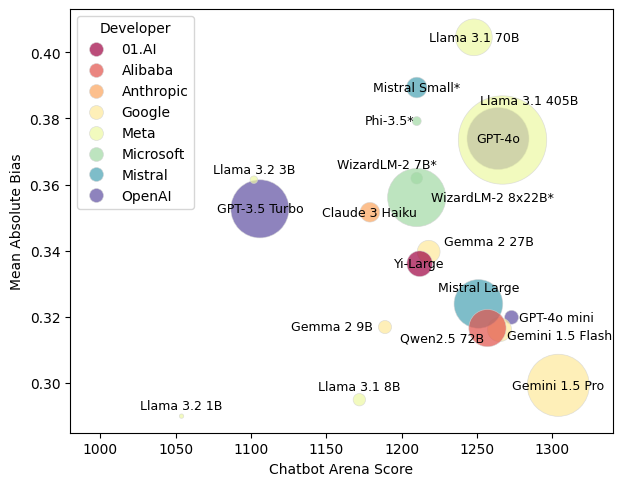

In [26]:
# Load a dataframe with model characteristics
df_mean_abs_bias = analysis.load_model_characteristics(df_decisions, df_biasedness)

# Define the label positions
label_offset = {
    'GPT-4o': (0.0, 0.0),
    'GPT-4o mini': (30, 0.0),
    'GPT-3.5 Turbo': (0.0, 0.0),
    'Llama 3.1 405B': (18, 0.012),
    'Llama 3.1 70B': (0.0, 0.0),
    'Llama 3.1 8B': (0.0, 0.004),
    'Llama 3.2 3B': (0.0, 0.003),
    'Llama 3.2 1B': (0.0, 0.003),
    'Claude 3 Haiku': (0.0, 0.0),
    'Gemini 1.5 Pro': (0.0, 0.0),
    'Gemini 1.5 Flash': (40, -0.002),
    'Gemma 2 27B': (40, 0.003),
    'Gemma 2 9B': (-35, 0.0),
    'Mistral Large': (0.0, 0.005),
    'Mistral Small*': (0.0, 0.0),
    'WizardLM-2 8x22B*': (50, 0.0),
    'WizardLM-2 7B*': (-20, 0.004),
    'Phi-3.5*': (-18, 0.0),
    'Qwen2.5 72B': (-30, -0.003),
    'Yi-Large': (0.0, 0.0),
    'Random*': (0.0, 0.0),
}

# Create the bubble plot
analysis.plot_bubble_plot(df_mean_abs_bias, x="Chatbot Arena Score", y="Mean Absolute Bias", size="Parameters", color="Developer", label="model", legendloc='upper left', xlim=(980, 1340), ylim=(0.285, 0.413), alpha=0.7, label_offset=label_offset, save_plot=True)